# Setup

In [1]:
# Load necessary libraries
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
# can add font_scale=1.5 if necessary
sns.set(style='whitegrid', palette='muted')

# plt.style.use('seaborn')
# NOTE: rcParams need to be after style.use
plt.rcParams["figure.figsize"] = (22, 10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting some visualization parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
orig_df = pd.read_csv('data//vehicles.csv')
orig_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500,2003.0,chrysler,town & country,excellent,6 cylinders,...,fwd,mid-size,mini-van,blue,https://images.craigslist.org/00w0w_41YO8cHlW3...,2003 Chrysler Town and Country Handicapped Acc...,NaN,al,32.614209,-85.326357
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,fwd,NaN,other,white,https://images.craigslist.org/00c0c_kXhBir3Ii6...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590,2013.0,lincoln,mkz sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,...,fwd,NaN,other,NaN,https://images.craigslist.org/00w0w_b3G8mxfApI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
4,7307142186,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00F0F_ghX7UUlnBr...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000


In [237]:
df = orig_df.copy()

In [13]:
df.shape

(441396, 25)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441396 entries, 0 to 441395
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            441396 non-null  int64  
 1   url           441396 non-null  object 
 2   region        441396 non-null  object 
 3   region_url    441396 non-null  object 
 4   price         441396 non-null  int64  
 5   year          440359 non-null  float64
 6   manufacturer  423019 non-null  object 
 7   model         436057 non-null  object 
 8   condition     257554 non-null  object 
 9   cylinders     253231 non-null  object 
 10  fuel          438515 non-null  object 
 11  odometer      437018 non-null  float64
 12  title_status  432451 non-null  object 
 13  transmission  438769 non-null  object 
 14  VIN           277315 non-null  object 
 15  drive         307747 non-null  object 
 16  size          125812 non-null  object 
 17  type          346047 non-null  object 
 18  pain

In [15]:
df.iloc[0].to_dict()

{'id': 7307730503,
 'url': 'https://auburn.craigslist.org/cto/d/opelika-handicapped-accessible-van/7307730503.html',
 'region': 'auburn',
 'region_url': 'https://auburn.craigslist.org',
 'price': 9500,
 'year': 2003.0,
 'manufacturer': 'chrysler',
 'model': 'town & country',
 'condition': 'excellent',
 'cylinders': '6 cylinders',
 'fuel': 'gas',
 'odometer': 30376.0,
 'title_status': 'clean',
 'transmission': 'automatic',
 'VIN': nan,
 'drive': 'fwd',
 'size': 'mid-size',
 'type': 'mini-van',
 'paint_color': 'blue',
 'image_url': 'https://images.craigslist.org/00w0w_41YO8cHlW3Cz_0iP0CI_600x450.jpg',
 'description': '2003 Chrysler Town and Country Handicapped Accessible van. Only 30,376 miles, almost new tires. Just serviced at Express Lube Opelika. Death in family, no longer needed. Power fold out ramp on right side. Dropped floor with 4 anchor points with straps to hold wheel chair. Removable front passenger seat. Excellent condition, runs and drives great. Gets exceptional fuel milea

In [16]:
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [17]:
df.describe()

,id,price,year,odometer,county,lat,long
count,"441,396.0000","441,396.0000","440,359.0000","437,018.0000",0.0000,"434,669.0000","434,669.0000"
mean,"7,302,967,800.8109","64,002.1936","2,011.4915","225,255.5817",NaN,38.4746,-94.5670
std,"4,524,183.4032","11,092,408.5294",9.2718,"16,015,357.7518",NaN,5.8561,18.2378
min,"7,208,549,803.0000",0.0000,"1,900.0000",0.0000,NaN,-73.0811,-175.3198
25%,"7,299,673,160.5000","5,950.0000","2,009.0000","39,427.0000",NaN,34.4296,-111.8000
50%,"7,303,985,789.0000","13,477.5000","2,014.0000","85,000.0000",NaN,39.1573,-88.1673
75%,"7,306,983,760.0000","24,999.0000","2,017.0000","131,000.0000",NaN,42.3542,-80.8325
max,"7,308,633,996.0000","3,736,928,711.0000","2,022.0000","2,000,799,401.0000",NaN,84.6202,173.8855


In [18]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [238]:
# dropping unnecessary columns
df.drop(columns=['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county'], inplace=True)

# Inspecting

In [239]:
# ProfileReport(df)

In [240]:
orig_df.shape

(441396, 25)

In [241]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [242]:
df = df.loc[df['price'] != 0, :]

In [243]:
orig_df.nunique()

id              441396
url             441396
region             404
region_url         413
price            16056
year               110
manufacturer        42
model            30082
condition            6
cylinders            8
fuel                 5
odometer        107994
title_status         6
transmission         3
VIN             123662
drive                3
size                 4
type                13
paint_color         12
image_url       249901
description     372922
county               0
state               51
lat              52750
long             53409
dtype: int64

In [244]:
# model has high cardinality
# region and state conveys the same meaning with the 
#   lat and long features
df.drop(columns=['region', 'model', 'state'], inplace=True)

In [245]:
df.shape

(356997, 15)

In [246]:
df.shape[0] / orig_df.shape[0]

0.8087907457249273

In [247]:
df.nunique()

price            16055
year               109
manufacturer        42
condition            6
cylinders            8
fuel                 5
odometer        102215
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
lat              51756
long             52433
dtype: int64

## Missing values

In [248]:
df.dtypes

price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
dtype: object

In [249]:
missing_pct = df.isna().sum() / len(df) * 100
missing_pct[missing_pct > 0].sort_values(ascending=False)

size           71.1115
cylinders      41.0132
condition      36.9947
drive          29.9619
paint_color    28.2252
type           21.0960
manufacturer    4.2799
title_status    1.9544
lat             1.0513
long            1.0513
fuel            0.5675
odometer        0.5289
transmission    0.4532
year            0.2431
dtype: float64

In [250]:
df['size'].value_counts(dropna=False, normalize=True)

NaN           0.7111
full-size     0.1501
mid-size      0.0843
compact       0.0471
sub-compact   0.0074
Name: size, dtype: float64

In [251]:
# 70% of them is missing, too large
df.drop(columns='size', inplace=True)

In [252]:
df['cylinders'].value_counts(dropna=False, normalize=True)

NaN            0.4101
6 cylinders    0.2241
4 cylinders    0.1867
8 cylinders    0.1665
5 cylinders    0.0042
10 cylinders   0.0033
other          0.0031
3 cylinders    0.0015
12 cylinders   0.0005
Name: cylinders, dtype: float64

In [253]:
def clean_cylinder(item):
    if type(item) == float:
        # return np.nan
        return 'unknown'
    if item == 'other':
        return 'other'
    try:
        new = int(item.split()[0])
    except Exception as e:
        raise Exception(f'Error with {item}')
    return new

In [254]:
# to be imputed later if necessary
df['cylinders'] = df['cylinders'].apply(clean_cylinder)

In [265]:
df['cylinders'].value_counts(dropna=False, normalize=True)

unknown   0.4101
6         0.2241
4         0.1867
8         0.1665
5         0.0042
10        0.0033
other     0.0031
3         0.0015
12        0.0005
Name: cylinders, dtype: float64

In [266]:
df['condition'].value_counts(dropna=False, normalize=True)

unknown     0.3699
good        0.3221
excellent   0.2355
like new    0.0514
fair        0.0167
new         0.0029
salvage     0.0016
Name: condition, dtype: float64

In [267]:
df['condition'].fillna('unknown', inplace=True)

In [268]:
df['drive'].value_counts(dropna=False, normalize=True)

unknown   0.2996
4wd       0.2961
fwd       0.2588
rwd       0.1455
Name: drive, dtype: float64

In [269]:
df['drive'].fillna('unknown', inplace=True)

In [270]:
df['paint_color'].value_counts(dropna=False, normalize=True)

unknown   0.2823
white     0.1888
black     0.1566
silver    0.1027
blue      0.0766
red       0.0700
grey      0.0587
green     0.0182
custom    0.0180
brown     0.0163
orange    0.0053
yellow    0.0048
purple    0.0017
Name: paint_color, dtype: float64

In [271]:
df['paint_color'].fillna('unknown', inplace=True)

In [272]:
df['type'].value_counts(dropna=False, normalize=True)

sedan         0.2143
unknown       0.2110
SUV           0.1788
pickup        0.0867
truck         0.0775
other         0.0584
coupe         0.0476
hatchback     0.0462
wagon         0.0260
van           0.0210
convertible   0.0185
mini-van      0.0115
offroad       0.0015
bus           0.0011
Name: type, dtype: float64

In [273]:
df['type'].fillna('unknown', inplace=True)

In [274]:
df['title_status'].value_counts()

clean         336697
rebuilt         7280
salvage         3655
lien            1467
missing          739
parts only       182
Name: title_status, dtype: int64

In [275]:
missing_pct = df.isna().sum() / len(df) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
missing_pct

manufacturer   4.2799
title_status   1.9544
lat            1.0513
long           1.0513
fuel           0.5675
odometer       0.5289
transmission   0.4532
year           0.2431
dtype: float64

In [277]:
# replace remaining 'unknown' categorical features 
cols_to_fill = list(missing_pct.index)

In [278]:
for col in cols_to_fill:
    if df[col].dtype == 'object':
        df[col].fillna('unknown', inplace=True)

In [280]:
df.describe()

,price,year,odometer,lat,long
count,"356,997.0000","356,129.0000","355,109.0000","353,244.0000","353,244.0000"
mean,"76,694.8013","2,011.1508","254,741.0591",38.4069,-93.8776
std,"12,334,057.1883",9.7494,"17,766,141.5868",5.7423,17.6859
min,1.0000,"1,900.0000",0.0000,-73.0811,-175.3198
25%,"7,450.0000","2,008.0000","38,269.0000",34.2976,-106.7991
50%,"14,995.0000","2,013.0000","84,429.0000",39.1996,-87.7362
75%,"26,990.0000","2,017.0000","132,237.0000",42.3030,-80.8248
max,"3,736,928,711.0000","2,022.0000","2,000,799,401.0000",84.6202,173.8855


In [283]:
# year larger than 2021 makes no sense
# df.year.clip(upper=2021, inplace=True)
df = df.loc[df.year != 2022]

In [284]:
df.isna().sum()

price              0
year             868
manufacturer       0
condition          0
cylinders          0
fuel               0
odometer        1888
title_status       0
transmission       0
drive              0
type               0
paint_color        0
lat             3753
long            3753
dtype: int64

In [285]:
df.nunique()

price            16052
year               108
manufacturer        43
condition            7
cylinders            9
fuel                 6
odometer        102211
title_status         7
transmission         4
drive                4
type                14
paint_color         13
lat              51742
long             52419
dtype: int64

In [286]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'lat', 'long'],
      dtype='object')

In [287]:
df.to_csv('data//first_clean.csv', index=False)

# Dividing the categorical and numerical columns

In [288]:
df = pd.read_csv('data//first_clean.csv')

In [289]:
df['cylinders'] = df['cylinders'].astype('object')

In [290]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Categorical variables:  {cats}')
print(f'Numerical variables:  {nums}')

Categorical variables:  ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
Numerical variables:  ['price', 'year', 'odometer', 'lat', 'long']


# Processing Categorical Features

In [291]:
df_cats = df[cats].copy()

In [292]:
df_cats.head()

,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color
0,chrysler,excellent,6,gas,clean,automatic,fwd,mini-van,blue
1,gmc,good,6,gas,clean,other,fwd,other,white
2,lincoln,good,unknown,gas,clean,other,fwd,sedan,red
3,gmc,good,6,gas,clean,other,fwd,other,unknown
4,lincoln,good,unknown,gas,clean,other,fwd,sedan,unknown


In [293]:
df_cats.nunique()

manufacturer    43
condition        7
cylinders        9
fuel             6
title_status     7
transmission     4
drive            4
type            14
paint_color     13
dtype: int64

In [294]:
df_cats.shape

(356917, 9)

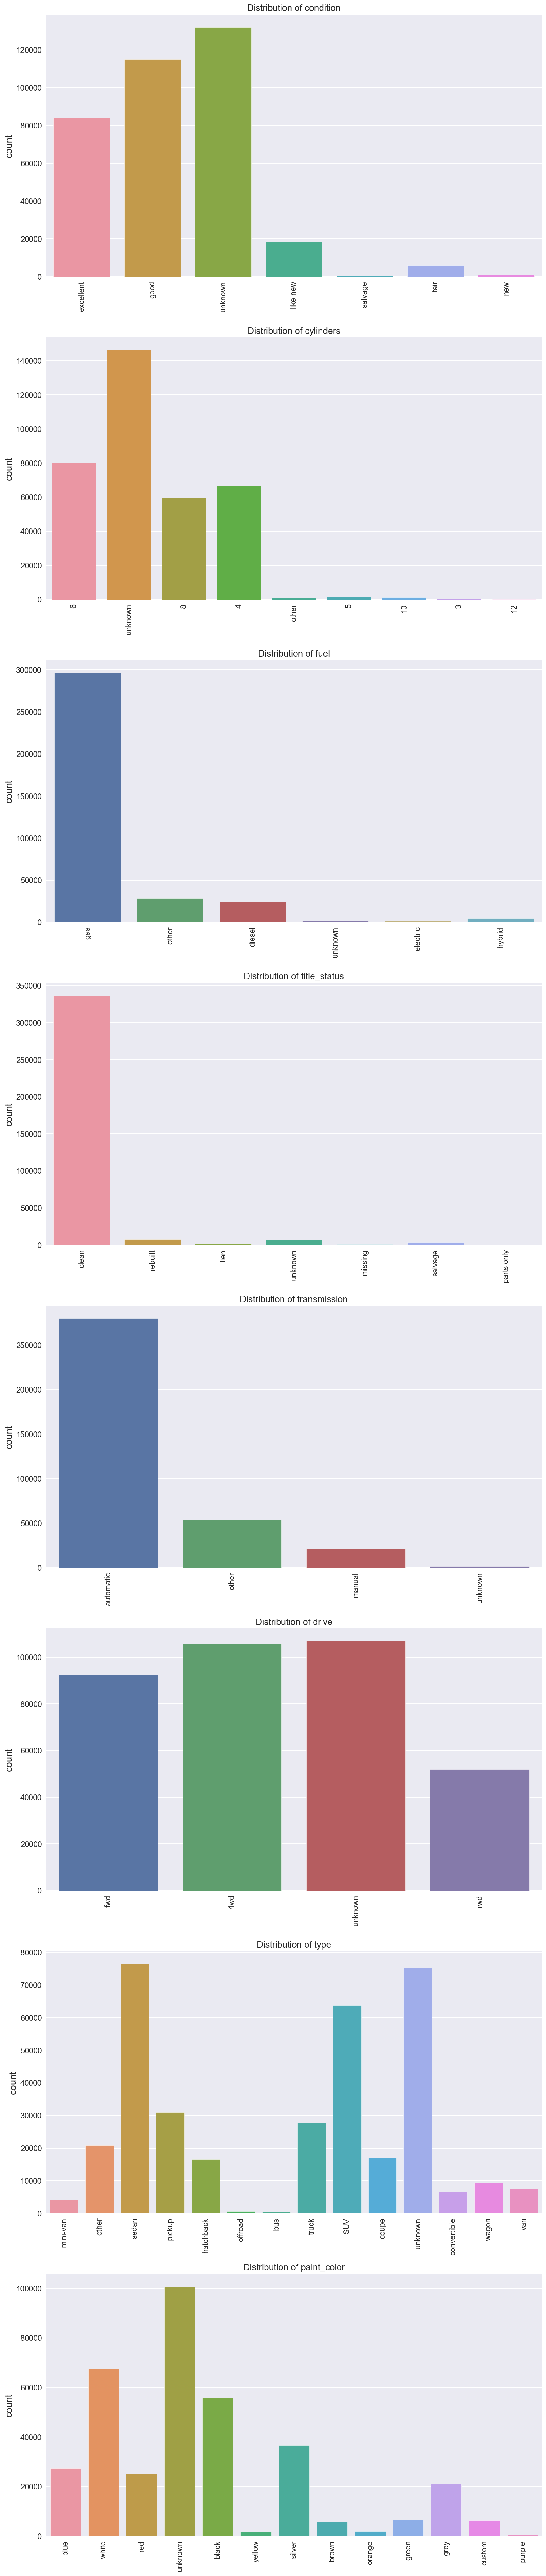

In [295]:
cols_to_ignore = ['manufacturer']
nrows = len(df_cats.columns) - len(cols_to_ignore)

fig = plt.figure(figsize=(12, nrows * 7))

i = 1
for cat in df_cats.columns:
    if cat in cols_to_ignore:
        continue
    ax = plt.subplot(nrows, 1, i)
    i += 1
    if cat == 'cylinders':
        sns.countplot(data=df_cats.fillna('unknown'), x=cat)
    else:
        sns.countplot(data=df_cats, x=cat)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}', size=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
        
plt.show()

In [296]:
def replace_low_prop(df, cat_feature, value='other', minimum=0.02, verbose=0):
    """
    To replace categories of very low proportion with another value
    """
    df_copy = df.copy()
    cat_pct = df_copy[cat_feature].value_counts(normalize=True).to_dict()
    if verbose:
        print(f'Before impute:\n{cat_pct}')
        print(f'Length: {len(cat_pct)}\n')
    for cat, pct in cat_pct.items():
        if pct < minimum:
            df_copy[cat_feature] = df_copy[cat_feature].replace(cat, value)
    if verbose:
        cat_pct = df_copy[cat_feature].value_counts(normalize=True).to_dict()
        print(f'After impute:\n{cat_pct}')
        print(f'Length: {len(cat_pct)}\n')
    return df_copy

In [297]:
df_cats = replace_low_prop(df_cats, 'condition', verbose=1)

Before impute:
{'unknown': 0.369937548505675, 'good': 0.32211970850365773, 'excellent': 0.23551413914159314, 'like new': 0.051370486695786415, 'fair': 0.01666774067920553, 'new': 0.002835393102598083, 'salvage': 0.0015549833714841265}
Length: 7

After impute:
{'unknown': 0.369937548505675, 'good': 0.32211970850365773, 'excellent': 0.23551413914159314, 'like new': 0.051370486695786415, 'other': 0.021058117153287738}
Length: 5



In [298]:
df_cats = replace_low_prop(df_cats, 'cylinders', value='other', verbose=1)

Before impute:
{'unknown': 0.4100869389802111, '6': 0.22418377381856286, '4': 0.18671567899539668, '8': 0.16654292174371071, '5': 0.004174640042362791, '10': 0.0032696677378774336, 'other': 0.0030567330779985263, '3': 0.0014569213570662088, '12': 0.0005127242468136849}
Length: 9

After impute:
{'unknown': 0.4100869389802111, '6': 0.22418377381856286, '4': 0.18671567899539668, '8': 0.16654292174371071, 'other': 0.012470686462118644}
Length: 5



In [299]:
# DROP THEM BETTER
df_cats = df_cats.loc[df_cats['cylinders'] != 'other']

In [300]:
df_cats['cylinders'].value_counts(dropna=False)

unknown    146367
6           80015
4           66642
8           59442
Name: cylinders, dtype: int64

In [136]:
# change it to float if necessary
# df_cats['cylinders'] = df_cats['cylinders'].astype(float)

In [301]:
df_cats = replace_low_prop(df_cats, 'fuel', verbose=1)

Before impute:
{'gas': 0.8307893527318947, 'other': 0.08015241186383935, 'diesel': 0.06669012046552007, 'hybrid': 0.01260263401292607, 'unknown': 0.005711189164344929, 'electric': 0.004054291761474866}
Length: 6

After impute:
{'gas': 0.8307893527318947, 'other': 0.10252052680258521, 'diesel': 0.06669012046552007}
Length: 3



In [302]:
df_cats = replace_low_prop(df_cats, 'title_status', verbose=1)

Before impute:
{'clean': 0.9433959587591427, 'rebuilt': 0.02042182792099096, 'unknown': 0.019400452809632703, 'salvage': 0.010179705276537311, 'lien': 0.004116709129391204, 'missing': 0.001997355773322817, 'parts only': 0.0004879903309822791}
Length: 7

After impute:
{'clean': 0.9433959587591427, 'other': 0.03618221331986631, 'rebuilt': 0.02042182792099096}
Length: 3



In [303]:
df_cats = replace_low_prop(df_cats, 'type', verbose=1)
df_cats = replace_low_prop(df_cats, 'paint_color', verbose=1)

Before impute:
{'sedan': 0.21410008341230077, 'unknown': 0.21128279039680423, 'SUV': 0.1797052765373114, 'pickup': 0.08723678312234372, 'truck': 0.07656908751482412, 'other': 0.05866381438209643, 'coupe': 0.047457059688026645, 'hatchback': 0.045899462643205304, 'wagon': 0.02588051046058343, 'van': 0.020960887007541153, 'convertible': 0.018279777340225723, 'mini-van': 0.01155856167687096, 'offroad': 0.001523551207776069, 'bus': 0.0008823546100900512}
Length: 14

After impute:
{'sedan': 0.21410008341230077, 'unknown': 0.21128279039680423, 'SUV': 0.1797052765373114, 'other': 0.09090805921705923, 'pickup': 0.08723678312234372, 'truck': 0.07656908751482412, 'coupe': 0.047457059688026645, 'hatchback': 0.045899462643205304, 'wagon': 0.02588051046058343, 'van': 0.020960887007541153}
Length: 10

Before impute:
{'unknown': 0.28362735696492714, 'white': 0.1878876260405259, 'black': 0.15676973098114427, 'silver': 0.10267657022237606, 'blue': 0.07652369306543043, 'red': 0.07006633263917654, 'grey':

# Processing Numerical Features

In [304]:
df_nums = df[nums].copy()

In [141]:
df_nums.shape

(356049, 5)

In [142]:
df_nums.head()

,price,year,odometer,lat,long
0,9500,"2,003.0000","30,376.0000",32.6142,-85.3264
1,28990,"2,018.0000","20,736.0000",32.5900,-85.4800
2,16590,"2,013.0000","61,087.0000",32.5900,-85.4800
3,28990,"2,017.0000","18,041.0000",32.5900,-85.4800
4,20590,"2,017.0000","36,436.0000",32.5900,-85.4800


In [143]:
df_nums.describe()

,price,year,odometer,lat,long
count,"356,049.0000","356,049.0000","354,204.0000","352,339.0000","352,339.0000"
mean,"76,793.9353","2,011.1484","255,230.8485",38.4099,-93.8587
std,"12,350,465.8489",9.7492,"17,788,797.0848",5.7414,17.6850
min,1.0000,"1,900.0000",0.0000,-73.0811,-175.3198
25%,"7,400.0000","2,008.0000","38,549.5000",34.3234,-106.7611
50%,"14,995.0000","2,013.0000","84,674.0000",39.2008,-87.7042
75%,"26,990.0000","2,017.0000","132,436.7500",42.3030,-80.8019
max,"3,736,928,711.0000","2,021.0000","2,000,799,401.0000",84.6202,173.8855


In [73]:
def plot_nums():
    nrows = len(nums)
    ncols = 3

    fig = plt.figure(1, (18, nrows*3))

    i = 0 
    for feature in nums:
        i += 1
        ax1 = plt.subplot(nrows, ncols, i)
        sns.kdeplot(data=df_nums, x=feature)
        ax1.set_xlabel(None)
        ax1.set_title(f'Distribution of {feature}')
        plt.tight_layout()

        i += 1
        ax2 = plt.subplot(nrows, ncols, i)
        sns.violinplot(data=df_nums, x=feature)
        ax2.set_xlabel(None)
        ax2.set_title(f'{feature} - Violin Plot')
        plt.tight_layout()

        i += 1
        ax3 = plt.subplot(nrows, ncols, i)
        sns.boxplot(data=df_nums, x=feature, orient='h', linewidth=2.5)
        ax3.set_xlabel(None)
        ax3.set_title(f'{feature} - Box Plot')
        plt.tight_layout()

    plt.show()

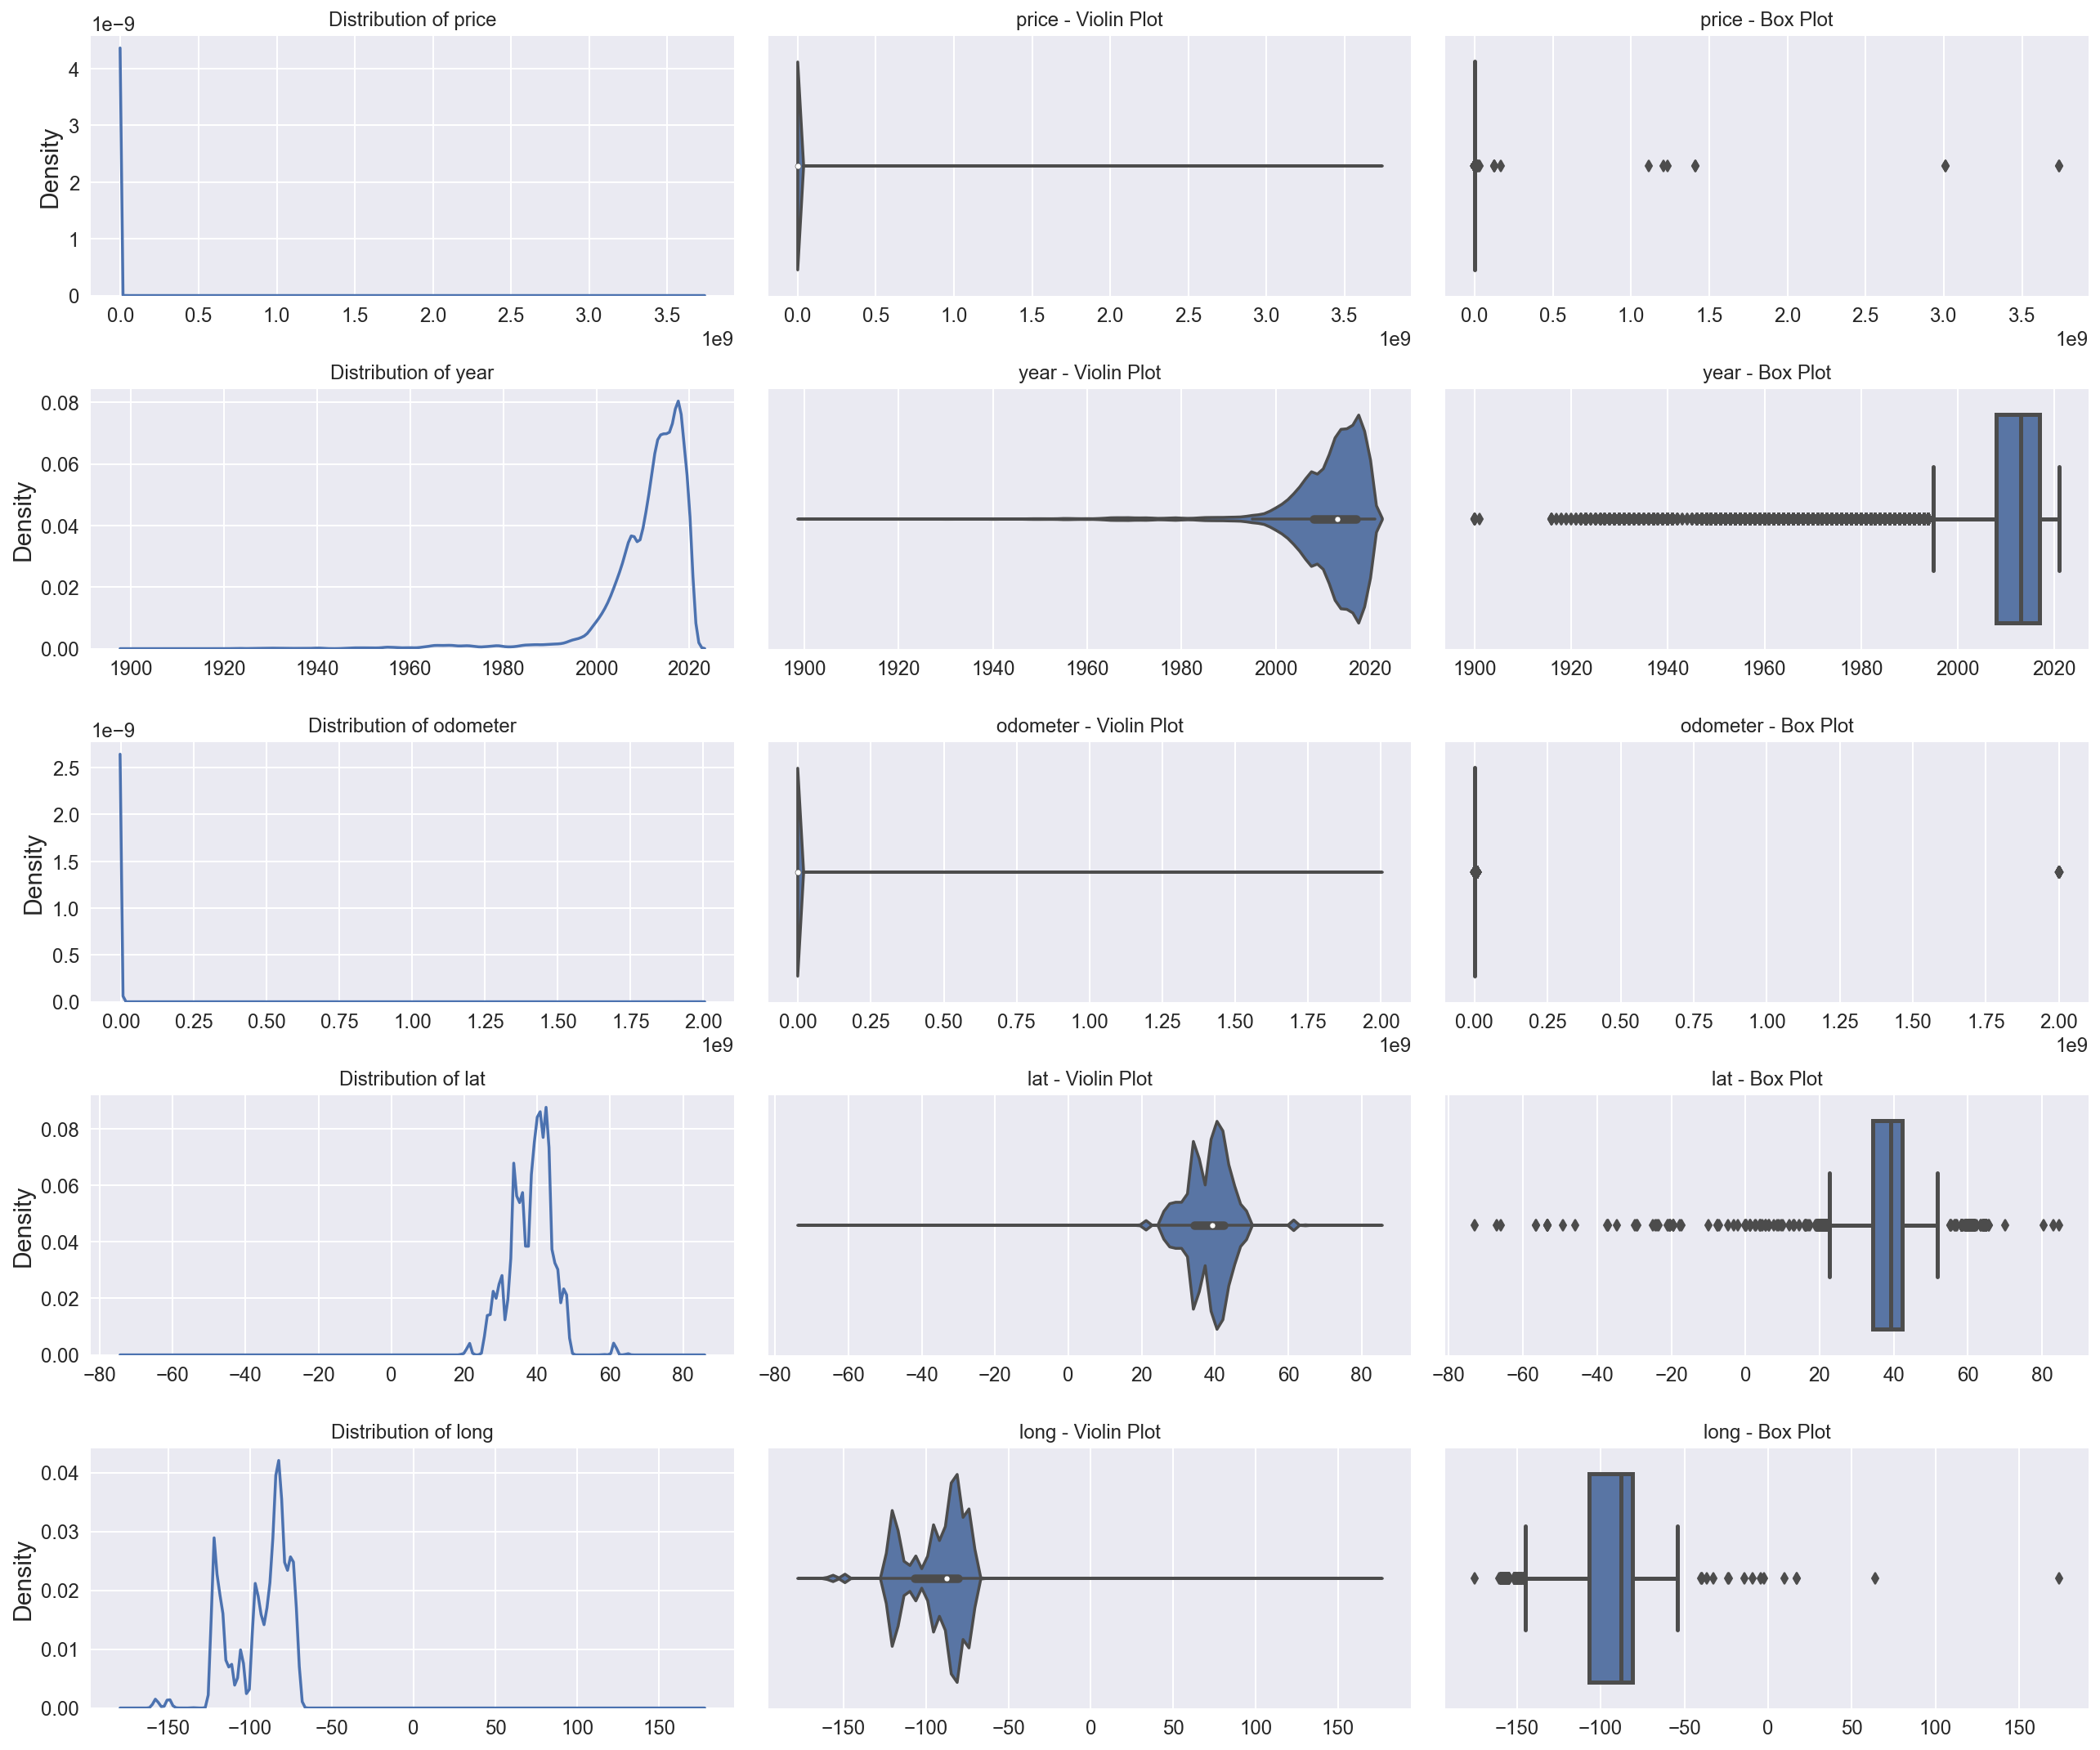

In [74]:
plot_nums()

## Removing outliers

In [166]:
df_nums.describe()

,price,year,odometer,lat,long
count,"356,049.0000","356,049.0000","354,204.0000","352,339.0000","352,339.0000"
mean,"76,793.9353","2,011.1484","255,230.8485",38.4099,-93.8587
std,"12,350,465.8489",9.7492,"17,788,797.0848",5.7414,17.6850
min,1.0000,"1,900.0000",0.0000,-73.0811,-175.3198
25%,"7,400.0000","2,008.0000","38,549.5000",34.3234,-106.7611
50%,"14,995.0000","2,013.0000","84,674.0000",39.2008,-87.7042
75%,"26,990.0000","2,017.0000","132,436.7500",42.3030,-80.8019
max,"3,736,928,711.0000","2,021.0000","2,000,799,401.0000",84.6202,173.8855


In [305]:
def tukey_outliers(x, verbose=0):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    
    lower_boundary = q1 - (iqr * 1.5)
    upper_boundary = q3 + (iqr * 1.5)
    if verbose:
        print(lower_boundary, upper_boundary)
    
    outliers = x[(x < lower_boundary) | (x > upper_boundary)]
    return outliers

In [306]:
outliers = tukey_outliers(df_nums["price"])
df_nums = df_nums.drop(outliers.index)

In [307]:
outliers = tukey_outliers(df_nums["odometer"].dropna())
# outliers.describe()
df_nums = df_nums.drop(outliers.index)

In [308]:
df_nums.describe()

,price,year,odometer,lat,long
count,"345,743.0000","345,033.0000","343,965.0000","342,085.0000","342,085.0000"
mean,"17,737.6272","2,011.1793","90,255.1968",38.4084,-93.6684
std,"12,736.6737",9.5680,"59,707.6459",5.7160,17.6200
min,1.0000,"1,900.0000",0.0000,-73.0811,-175.3198
25%,"7,295.0000","2,008.0000","39,463.0000",34.4376,-106.5549
50%,"14,990.0000","2,013.0000","85,000.0000",39.2199,-87.5400
75%,"25,991.0000","2,017.0000","131,440.0000",42.2900,-80.7052
max,"56,300.0000","2,021.0000","273,641.0000",84.6202,63.9494


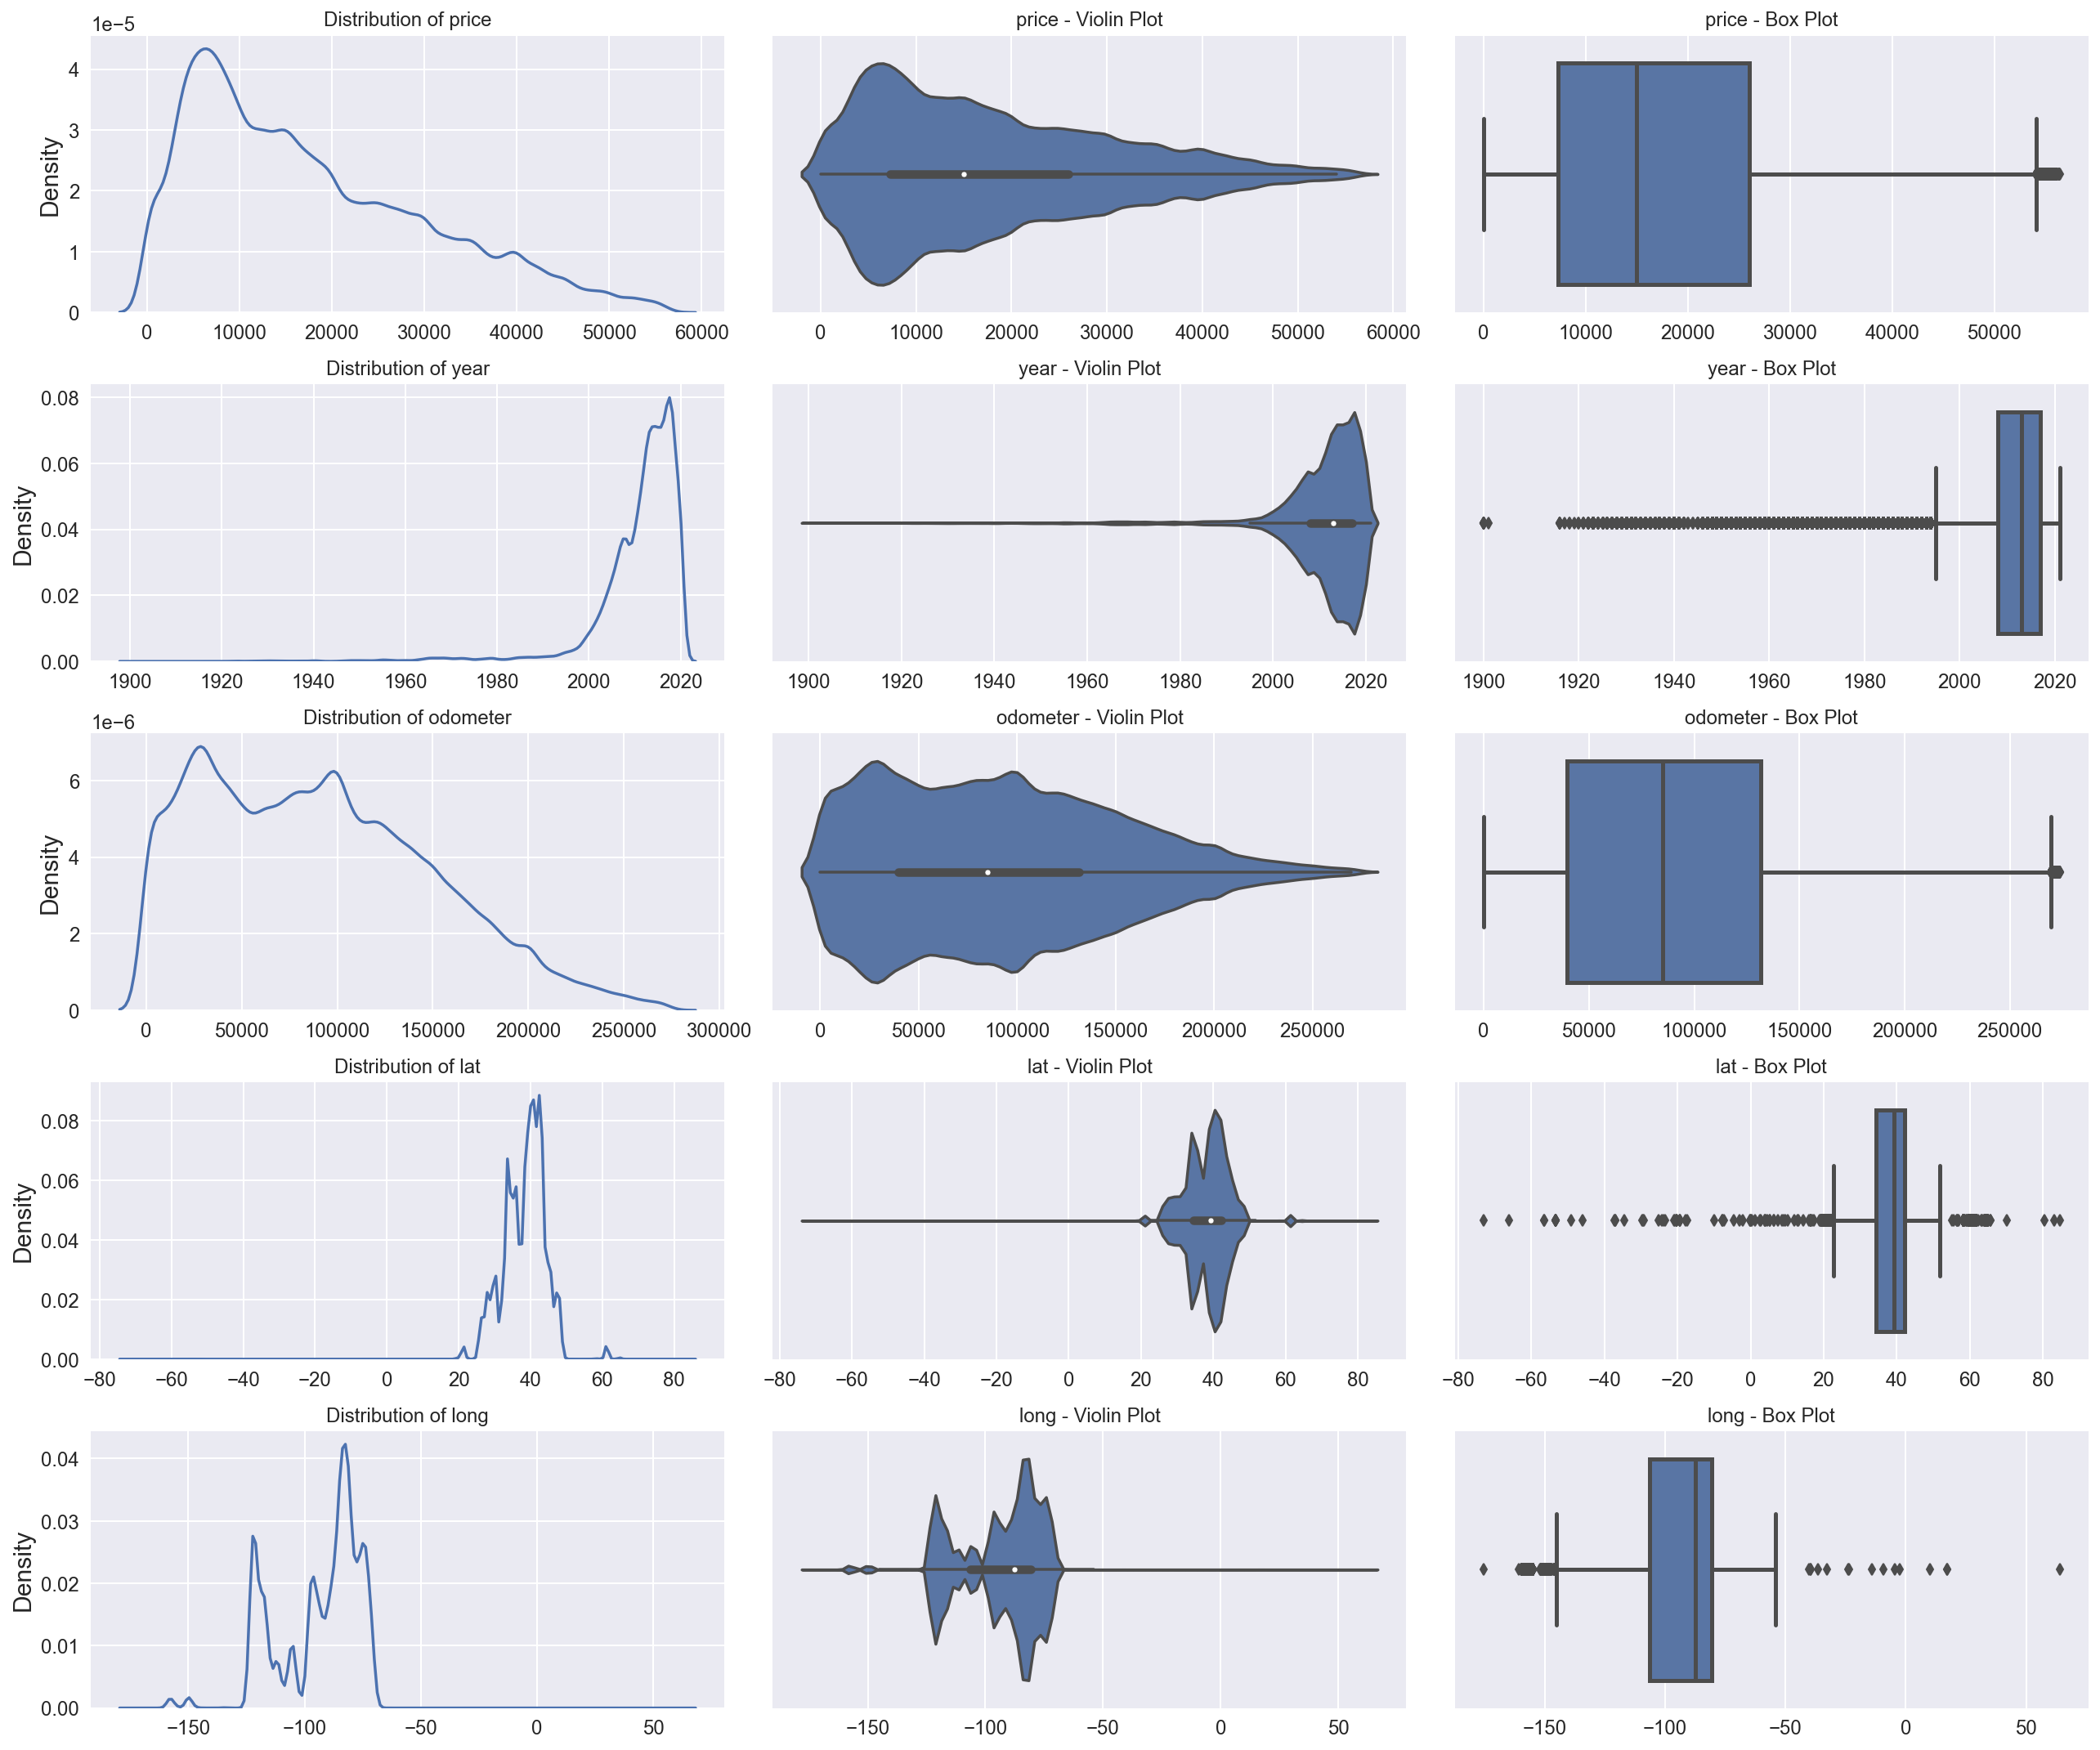

In [148]:
plot_nums()

In [171]:
df_nums.price.describe()

count   345,037.0000
mean     17,710.6829
std      12,721.1178
min           1.0000
25%       7,250.0000
50%      14,990.0000
75%      25,990.0000
max      56,375.0000
Name: price, dtype: float64

## Inspecting oddly low price

In [188]:
df_nums[df_nums.price == 1]

,price,year,odometer,lat,long
592,1,"1,999.0000","1,000.0000",33.7392,-86.7726
768,1,"2,005.0000","181,000.0000",33.5054,-86.8526
916,1,"2,012.0000","150,000.0000",35.2507,-87.3526
1252,1,"2,006.0000","126,426.0000",33.5207,-86.8025
1320,1,"2,006.0000","183,000.0000",33.5207,-86.8025
...,...,...,...,...,...
355064,1,"2,012.0000",123.0000,45.5497,-94.2245
355065,1,"2,012.0000",1.0000,45.5497,-94.2245
355066,1,"2,012.0000",123.0000,45.5497,-94.2245
355757,1,"2,000.0000",1.0000,42.0624,-104.1917


In [191]:
print(sorted(df_nums.price.unique())[:50])

[1002, 1005, 1011, 1013, 1014, 1025, 1031, 1040, 1042, 1045, 1047, 1050, 1053, 1055, 1057, 1061, 1062, 1063, 1065, 1075, 1083, 1095, 1099, 1100, 1109, 1111, 1116, 1128, 1149, 1150, 1168, 1183, 1187, 1189, 1195, 1198, 1199, 1200, 1204, 1205, 1207, 1210, 1212, 1216, 1219, 1222, 1225, 1230, 1231, 1234]


In [309]:
# Dropping very low prices
df_nums = df_nums.loc[df_nums.price > 1000]

In [193]:
import re
idx = 1234
row = orig_df.loc[orig_df.price == idx].iloc[0]
test_descp = row.description
print(test_descp)
print(re.search(r'\$\s*\d+\,*\d+', test_descp))

have for sale a 2004 Chrysler Sebring with the 2.4L engine. Has a little over 140k miles. Has been a reliable vehicle over the years but recently it has been acting up and I’m tired of dealing with it. Cycles engine but won’t start. Has fuel pressure, good spark and a clean intake. Maybe electrical related idk. Happened out of the blue. Getting a new car and this has to go. Also was having to warm up for long periods of time for transmission to engage. Once warmed up drove perfectly fine. Part it fix it I don’t care. Just being honest with its quirks. Make me an offer.  Thanks
None


In [194]:
df_nums.describe()

,price,year,odometer,lat,long
count,"333,523.0000","333,523.0000","331,890.0000","329,943.0000","329,943.0000"
mean,"18,307.9838","2,011.1838","90,625.9515",38.4070,-93.4277
std,"12,518.7397",9.5268,"59,668.3209",5.6696,17.4567
min,"1,002.0000","1,900.0000",0.0000,-73.0811,-175.3198
25%,"7,990.0000","2,008.0000","39,891.0000",34.5700,-105.2771
50%,"15,098.0000","2,013.0000","85,615.0000",39.1900,-87.1100
75%,"26,590.0000","2,017.0000","132,000.0000",42.2700,-80.6400
max,"56,375.0000","2,021.0000","273,641.0000",84.6202,63.9494


In [310]:
df_nums.shape

(334225, 5)

In [311]:
df_cats.shape

(352466, 9)

In [312]:
final_df = pd.merge(df_nums, df_cats, left_index=True, right_index=True)
final_df.shape

(330401, 14)

In [313]:
orig_df[final_df.columns].head()

,price,year,odometer,lat,long,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color
0,9500,"2,003.0000","30,376.0000",32.6142,-85.3264,chrysler,excellent,6 cylinders,gas,clean,automatic,fwd,mini-van,blue
1,28990,"2,018.0000","20,736.0000",32.5900,-85.4800,gmc,good,6 cylinders,gas,clean,other,fwd,other,white
2,16590,"2,013.0000","61,087.0000",32.5900,-85.4800,lincoln,good,NaN,gas,clean,other,fwd,sedan,red
3,28990,"2,017.0000","18,041.0000",32.5900,-85.4800,gmc,good,6 cylinders,gas,clean,other,fwd,other,NaN
4,20590,"2,017.0000","36,436.0000",32.5900,-85.4800,lincoln,good,NaN,gas,clean,other,fwd,sedan,NaN


In [314]:
final_df.head()

,price,year,odometer,lat,long,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color
0,9500,"2,003.0000","30,376.0000",32.6142,-85.3264,chrysler,excellent,6,gas,clean,automatic,fwd,other,blue
1,28990,"2,018.0000","20,736.0000",32.5900,-85.4800,gmc,good,6,gas,clean,other,fwd,other,white
2,16590,"2,013.0000","61,087.0000",32.5900,-85.4800,lincoln,good,unknown,gas,clean,other,fwd,sedan,red
3,28990,"2,017.0000","18,041.0000",32.5900,-85.4800,gmc,good,6,gas,clean,other,fwd,other,unknown
4,20590,"2,017.0000","36,436.0000",32.5900,-85.4800,lincoln,good,unknown,gas,clean,other,fwd,sedan,unknown


In [86]:
# final_df = pd.concat([df_cats, df_nums], axis=1)
# final_df.shape

In [315]:
final_df.isna().sum()

price              0
year             699
odometer        1655
lat             3608
long            3608
manufacturer       0
condition          0
cylinders          0
fuel               0
title_status       0
transmission       0
drive              0
type               0
paint_color        0
dtype: int64

In [201]:
missing_pct = final_df.isna().sum() / len(final_df) * 100
missing_pct[missing_pct > 0].sort_values(ascending=False)

cylinders   41.9377
lat          1.0799
long         1.0799
odometer     0.4895
dtype: float64

In [193]:
# final_df.drop(columns='cylinders', inplace=True)

In [202]:
final_df.shape[0] / orig_df.shape[0]

0.748928399894879

In [203]:
final_df.dropna(subset=['lat', 'long', 'odometer', 'year']).shape[0] / orig_df.shape[0]

0.7371747818285621

In [96]:
missing_pct = orig_df.isna().sum() / len(orig_df) * 100
missing_pct[missing_pct > 0].sort_values(ascending=False)

county         100.0000
size            71.4968
cylinders       42.6295
condition       41.6501
VIN             37.1732
drive           30.2787
paint_color     30.1367
type            21.6017
manufacturer     4.1634
title_status     2.0265
lat              1.5240
long             1.5240
model            1.2096
odometer         0.9919
fuel             0.6527
transmission     0.5952
year             0.2349
description      0.0127
image_url        0.0120
dtype: float64

In [316]:
# final_df.to_csv('data//cleaned_df.csv', index=False)

# Analysis of Some Features VS Price

In [11]:
df = pd.read_csv('data/cleaned_df.csv')
df.dtypes

price             int64
year            float64
odometer        float64
lat             float64
long            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
title_status     object
transmission     object
drive            object
type             object
paint_color      object
dtype: object

In [13]:
cats = list(df.select_dtypes(exclude=['float64', 'int64']).columns)
nums = list(df.select_dtypes(include=['float64', 'int64']).columns)
print(f'Categorical variables:  {cats}')
print(f'Numerical variables:  {nums}')

Categorical variables:  ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
Numerical variables:  ['price', 'year', 'odometer', 'lat', 'long']


In [112]:
def get_col_range(col):
    if col.name in nums:
        return (col.min(), col.max())
    else:
        return (col.unique())
col_range_df = df.apply(get_col_range)
col_range_df

price                                               (1002, 56300)
year                                             (1900.0, 2021.0)
odometer                                          (0.0, 273641.0)
lat                                       (-73.081059, 84.620231)
long                                     (-175.319824, 63.949445)
manufacturer    [chrysler, gmc, lincoln, ford, lexus, buick, j...
condition             [excellent, good, unknown, like new, other]
cylinders                                      [6, unknown, 8, 4]
fuel                                         [gas, other, diesel]
title_status                              [clean, rebuilt, other]
transmission                  [automatic, other, manual, unknown]
drive                                    [fwd, 4wd, unknown, rwd]
type            [other, sedan, pickup, hatchback, truck, SUV, ...
paint_color     [blue, white, red, unknown, black, other, silv...
dtype: object

In [114]:
col_range_df.loc['year'] = (2000, 2021)

In [115]:
col_range_df.to_json('data//col_range.json')

In [116]:
import json
col_range = json.load(open('data//col_range.json', 'r'))

In [117]:
col_range['year']

[2000, 2021]

In [105]:
x = None
y = x or 0
print(y)

0


In [90]:
np.random.randint(*col_range['year'])

1973

In [14]:
yearly_df = df.copy()
yearly_df.dropna(subset=['year'], inplace=True)
yearly_df.year = pd.to_datetime(yearly_df.year, format='%Y')
yearly_price = yearly_df.groupby('year')['price'].mean()
# yearly_df.index
yearly_price.head()

year
1900-01-01     7167.333333
1916-01-01    21975.000000
1918-01-01    10250.000000
1919-01-01    15500.000000
1920-01-01    22200.000000
Name: price, dtype: float64

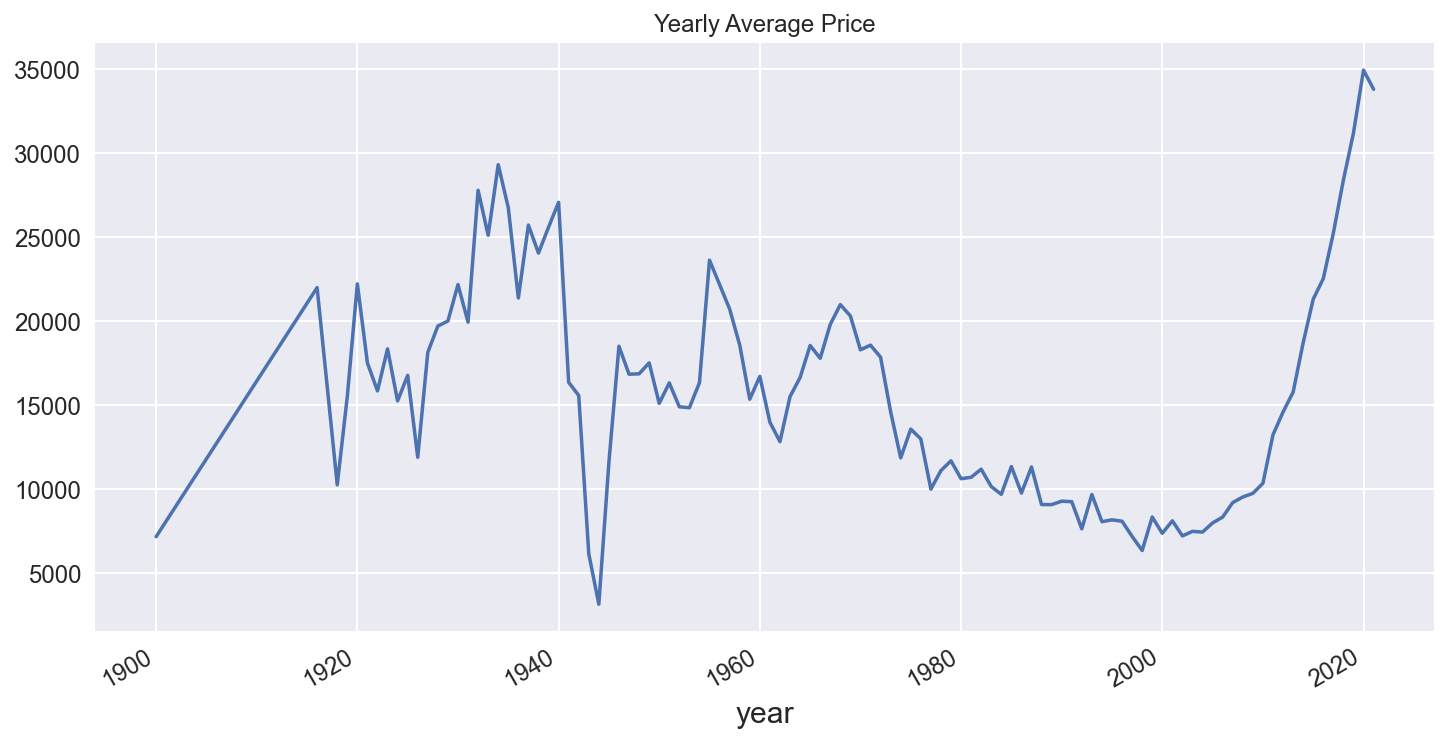

In [15]:
yearly_price.plot(title='Yearly Average Price', figsize=(12, 6))
plt.show()

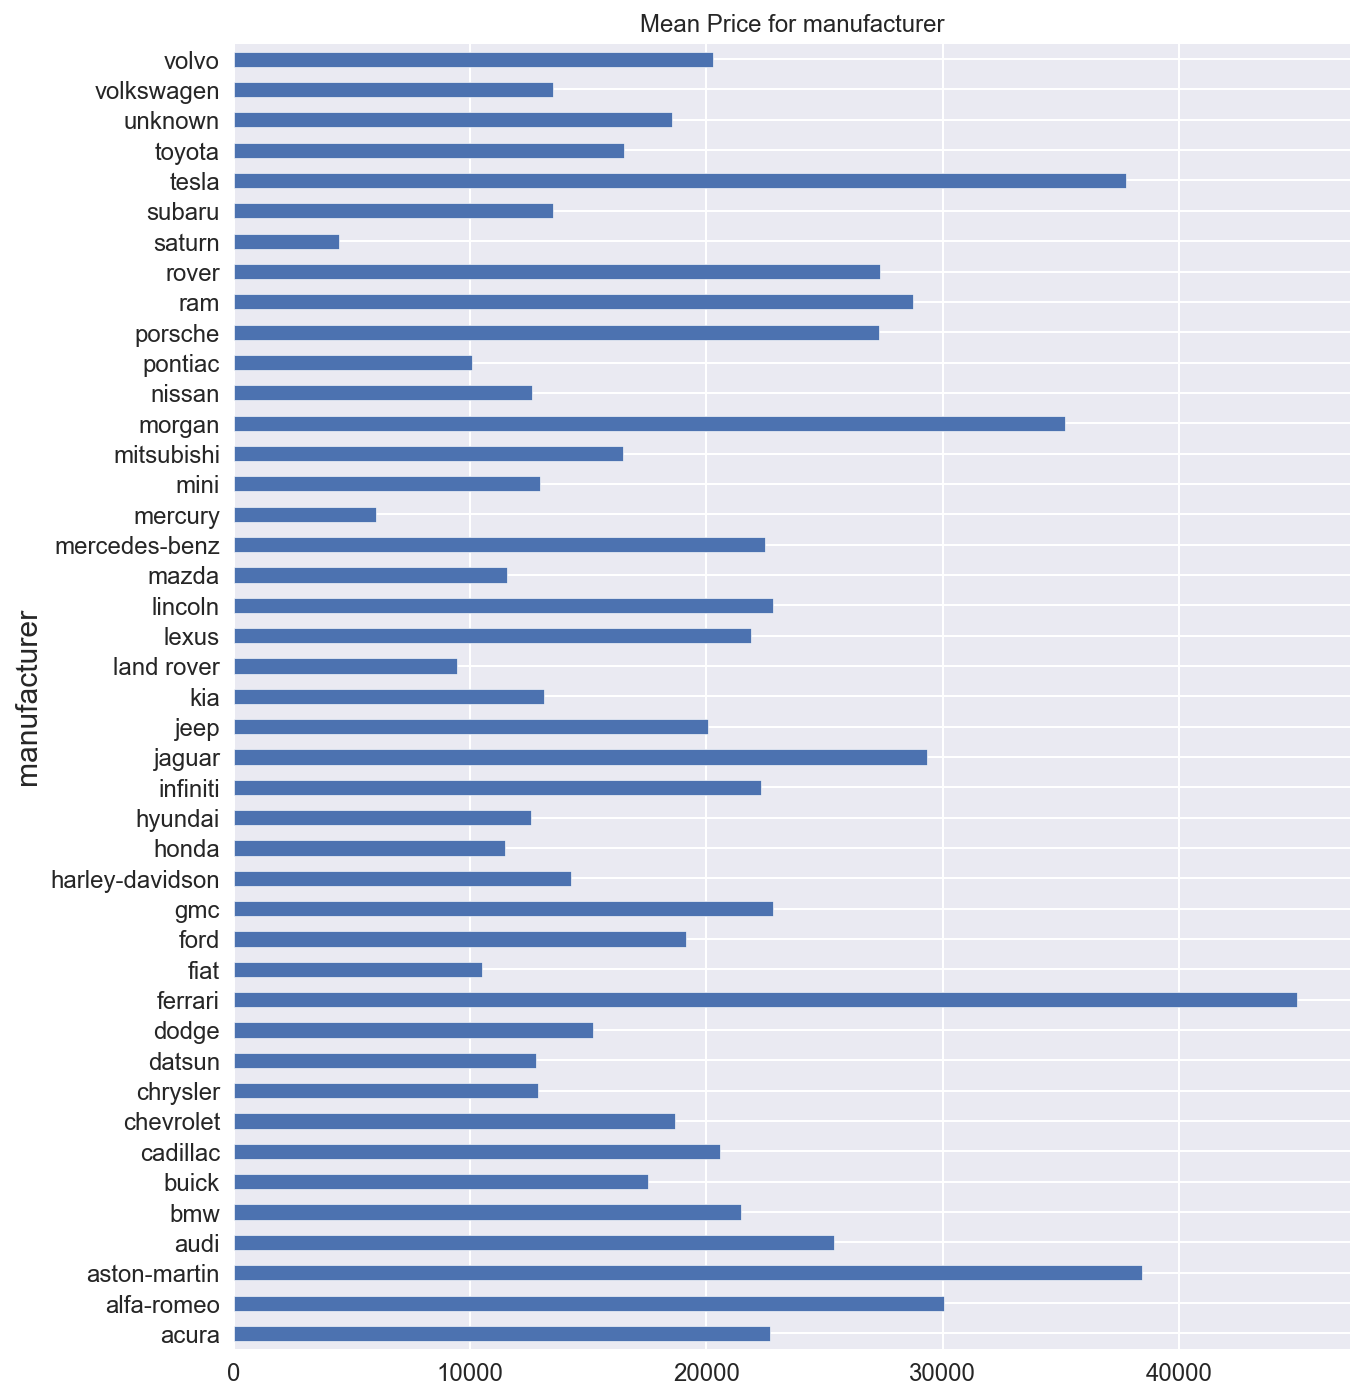

In [16]:
def plot_cat_vs_price(cat, figsize=(10, 12)):
    df.groupby(cat)['price'].mean().plot(kind='barh', figsize=figsize)
    plt.title(f'Mean Price for {cat}')
    plt.show()
plot_cat_vs_price('manufacturer')

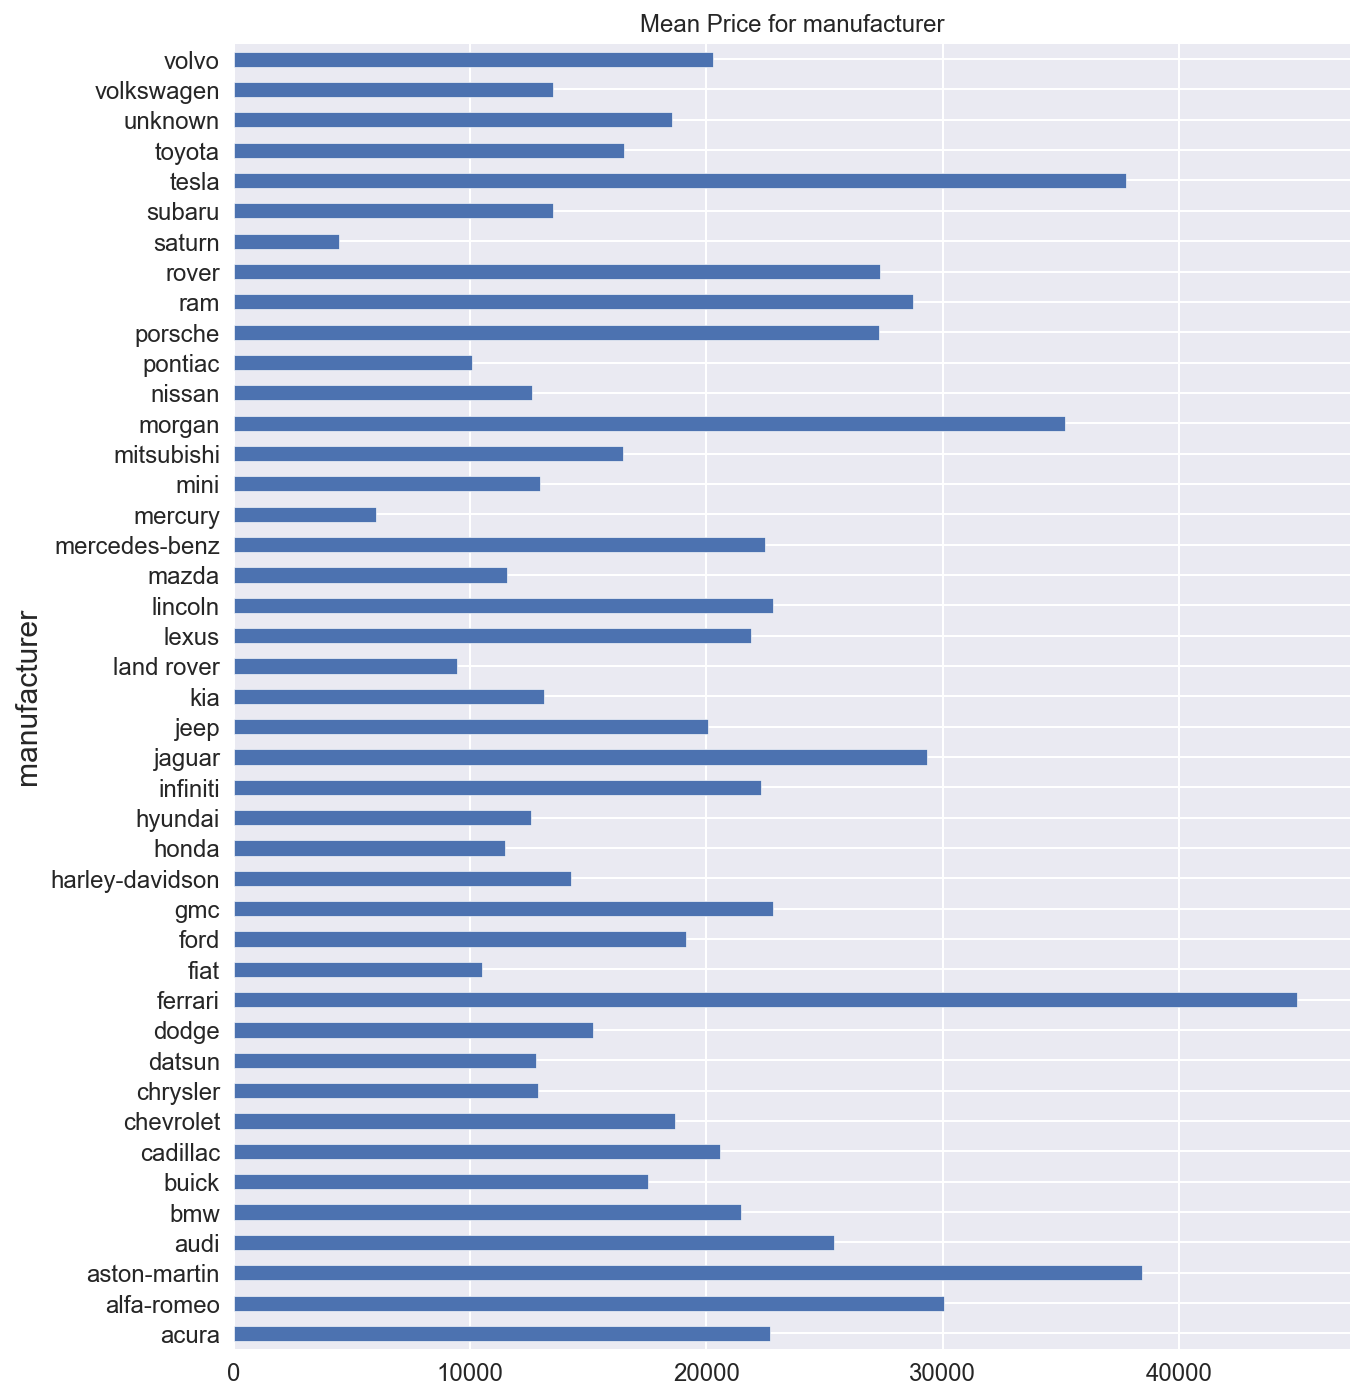

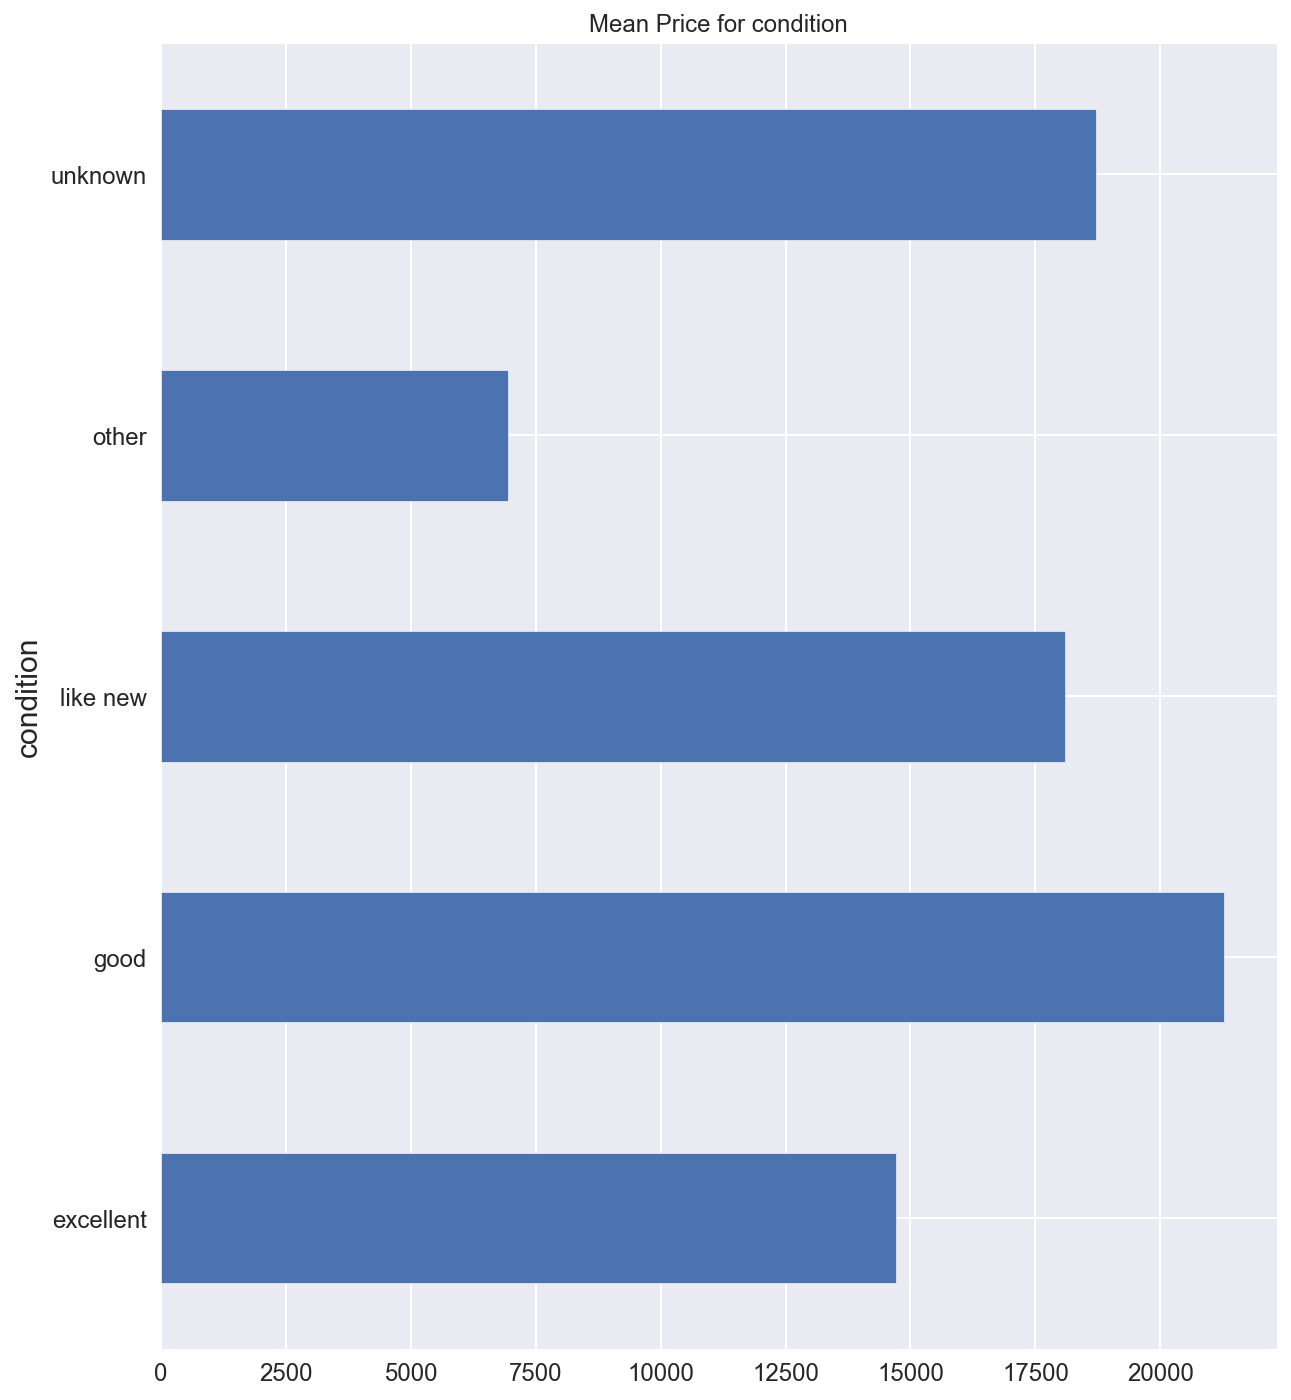

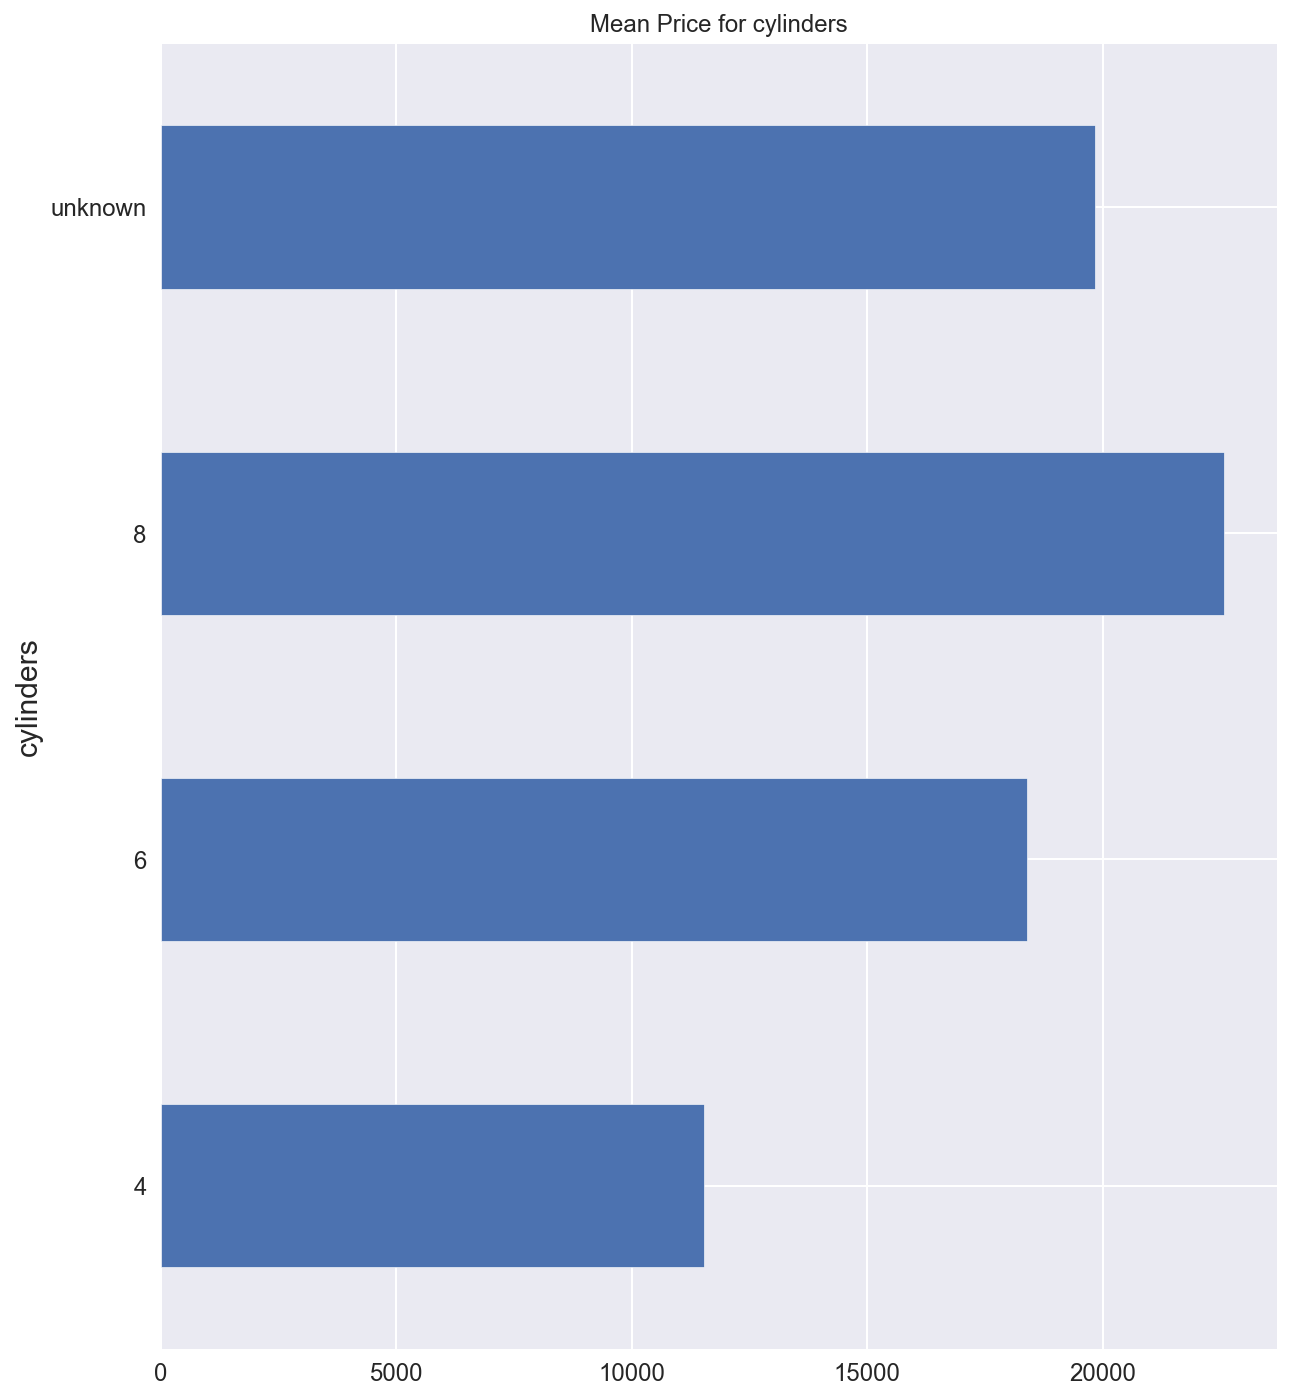

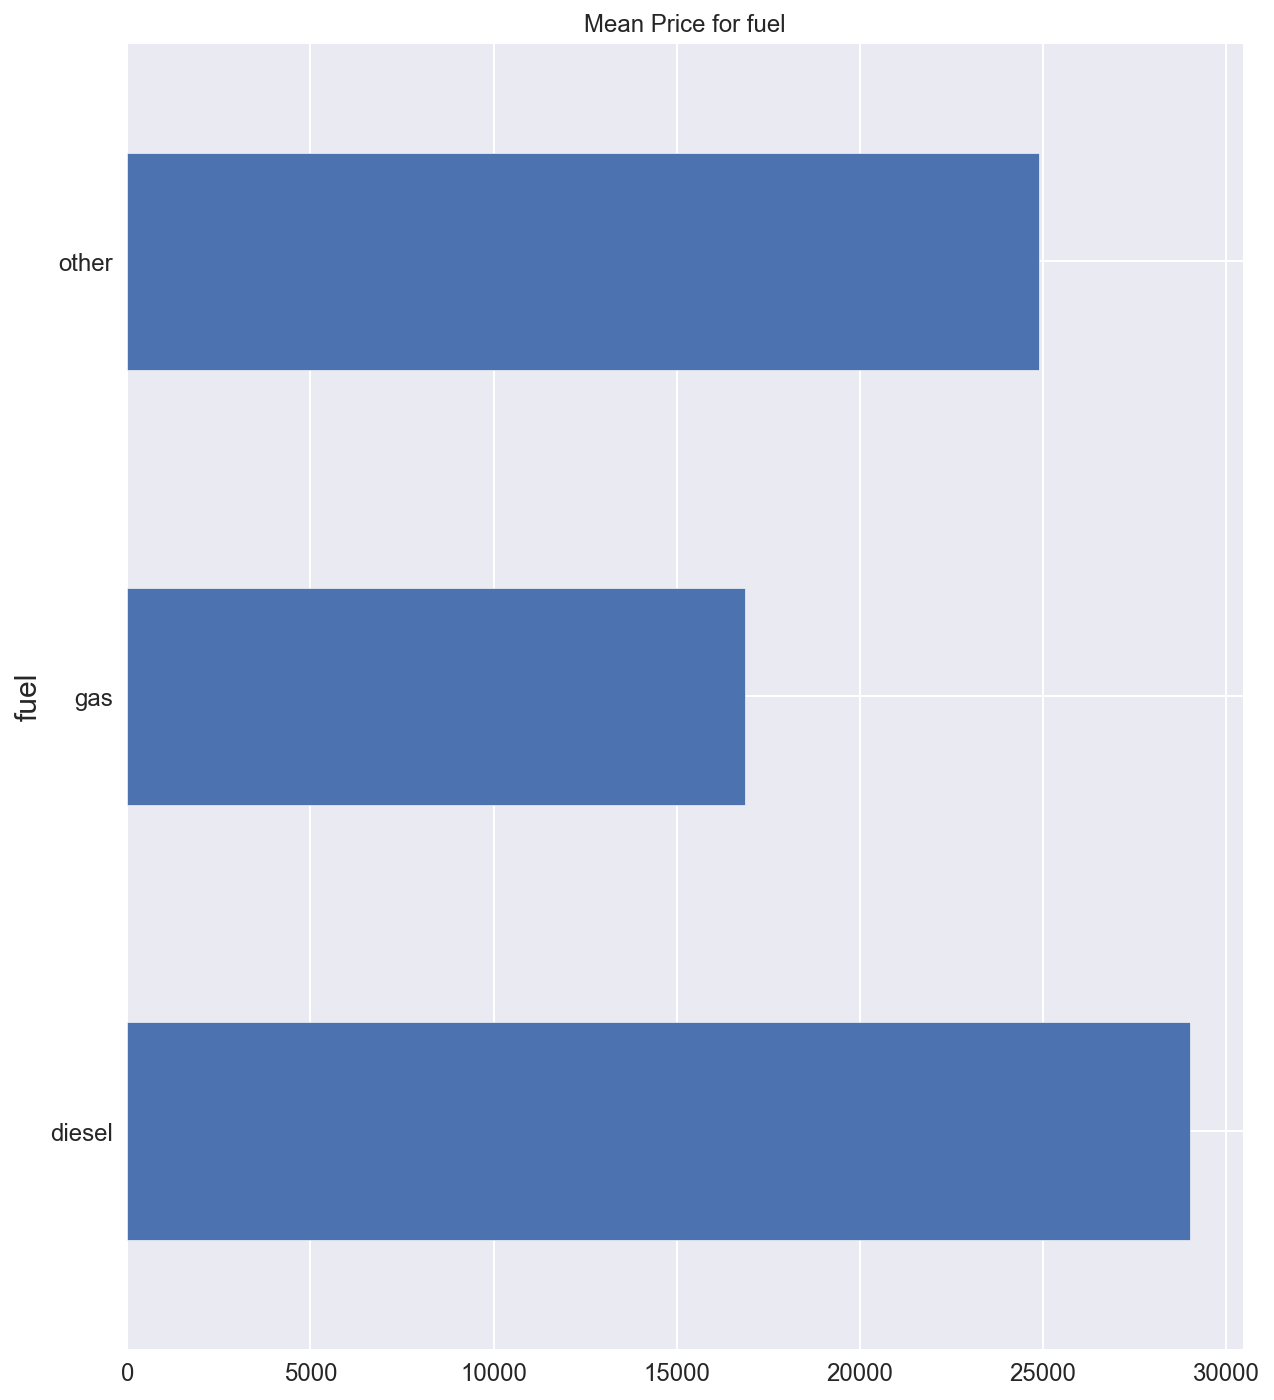

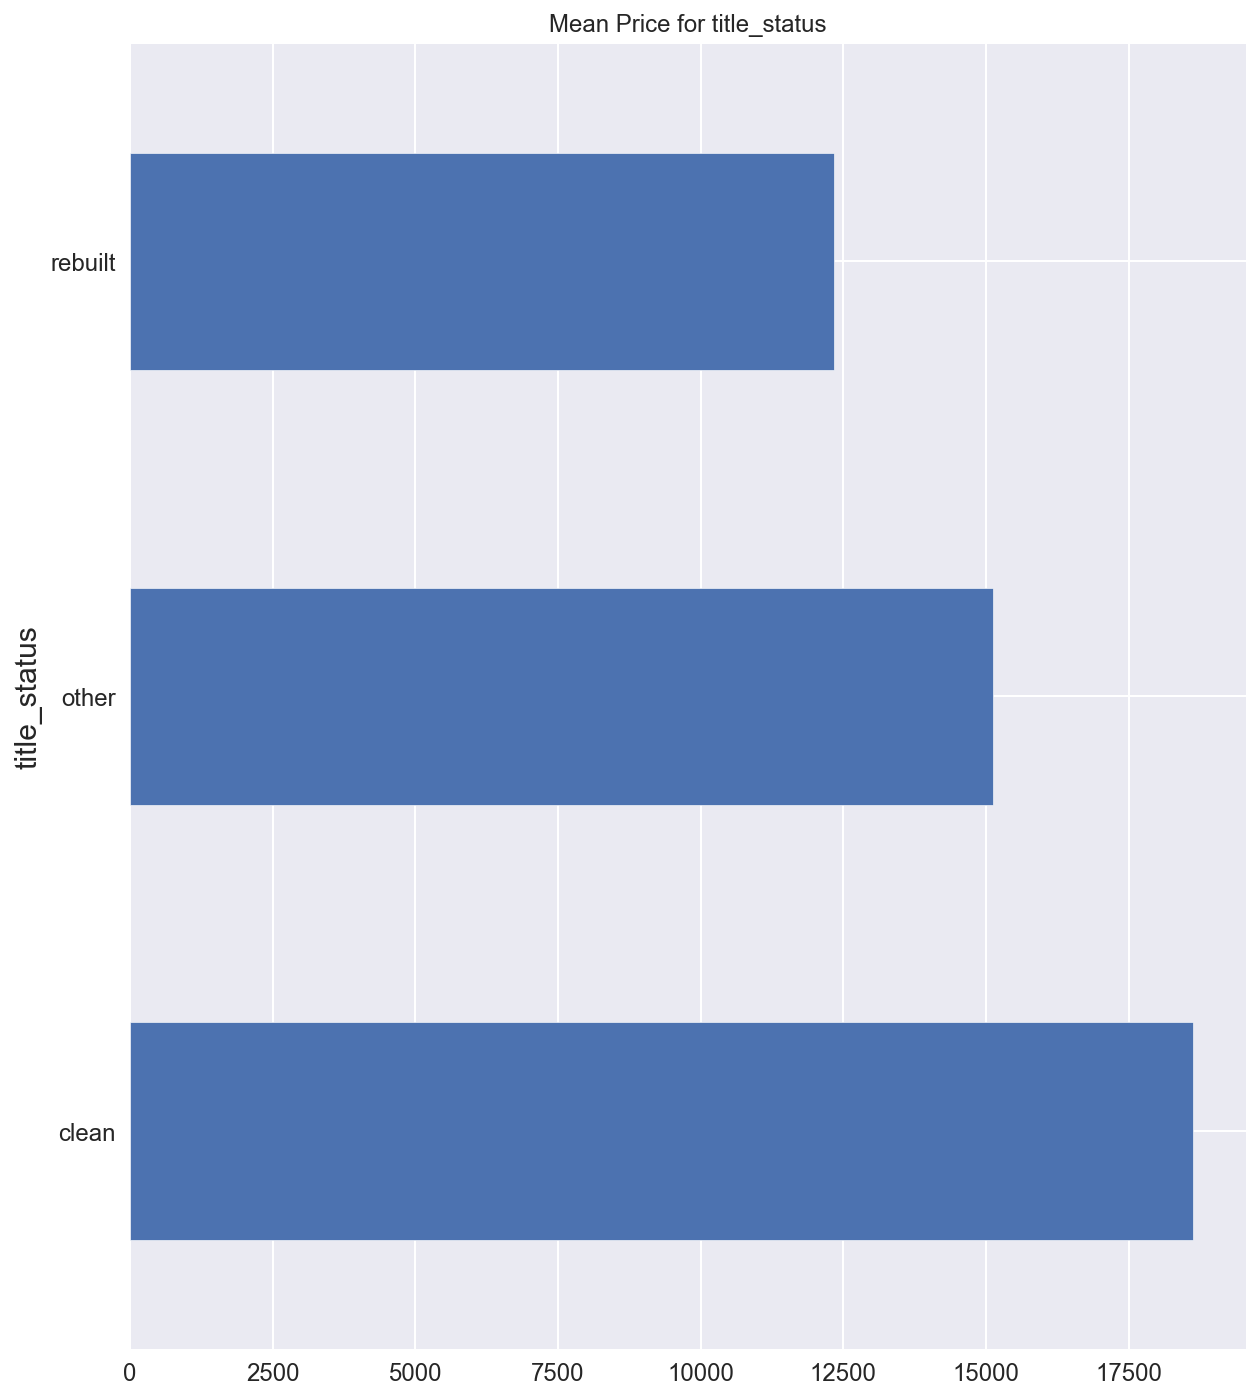

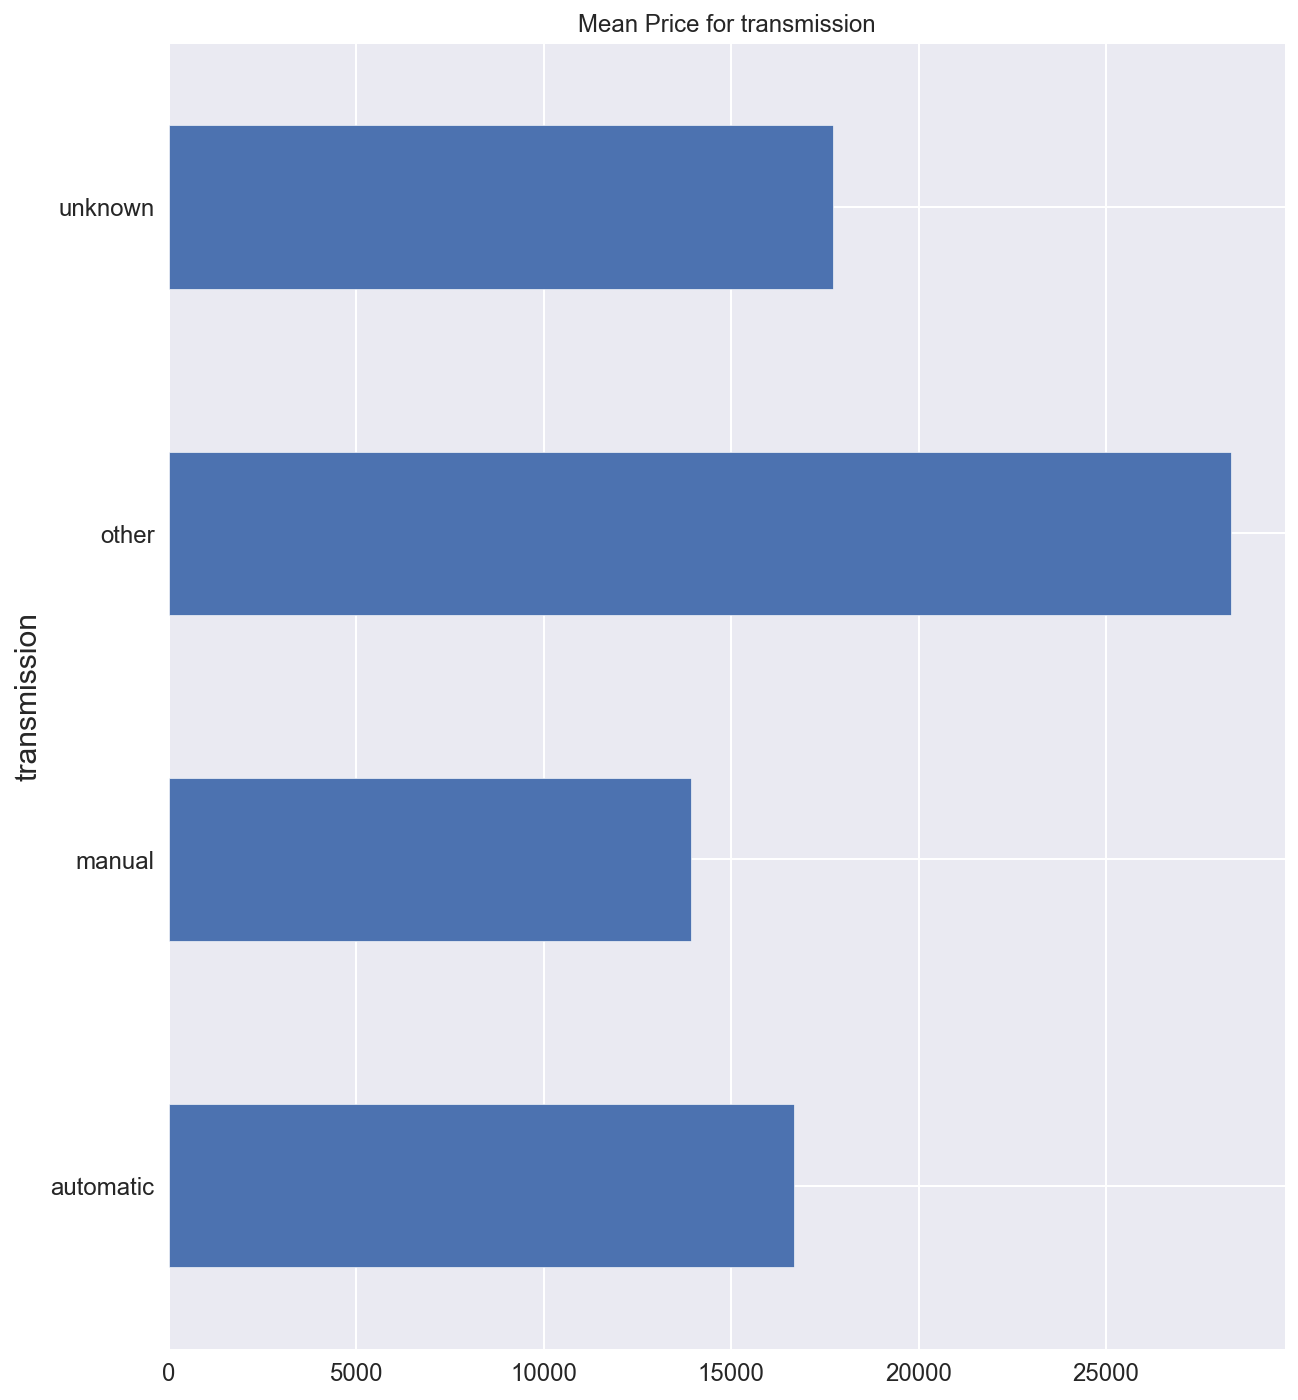

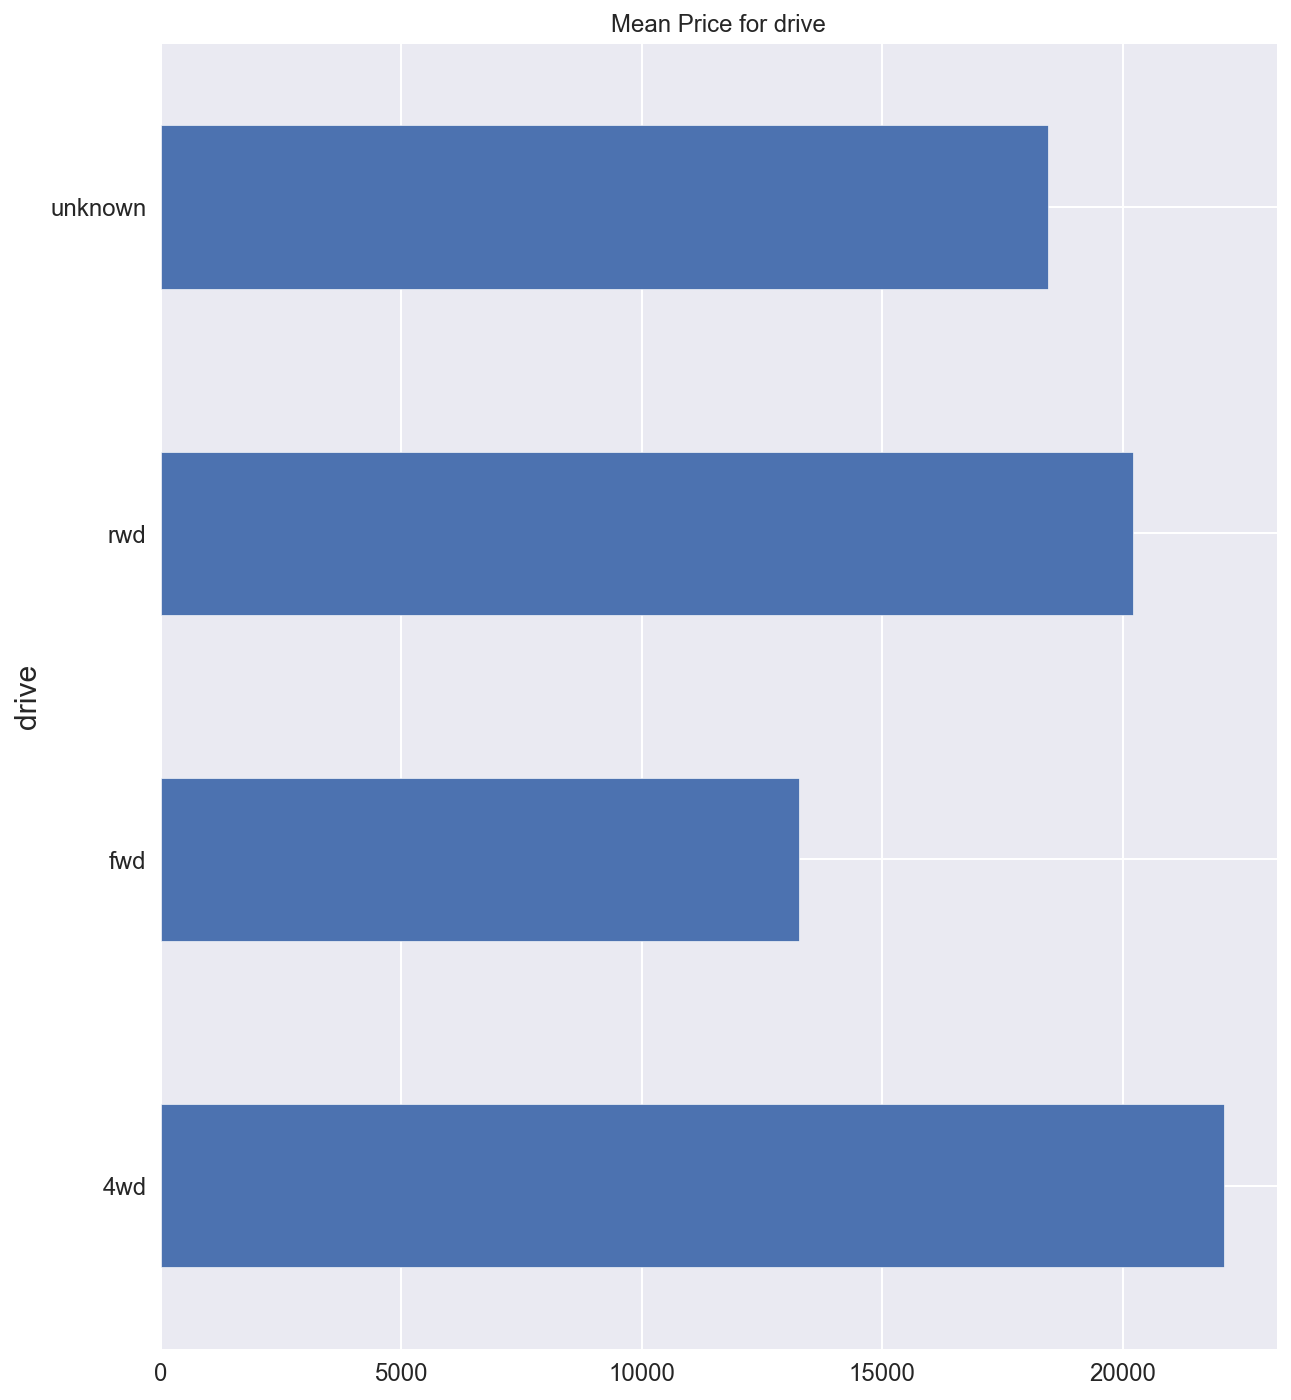

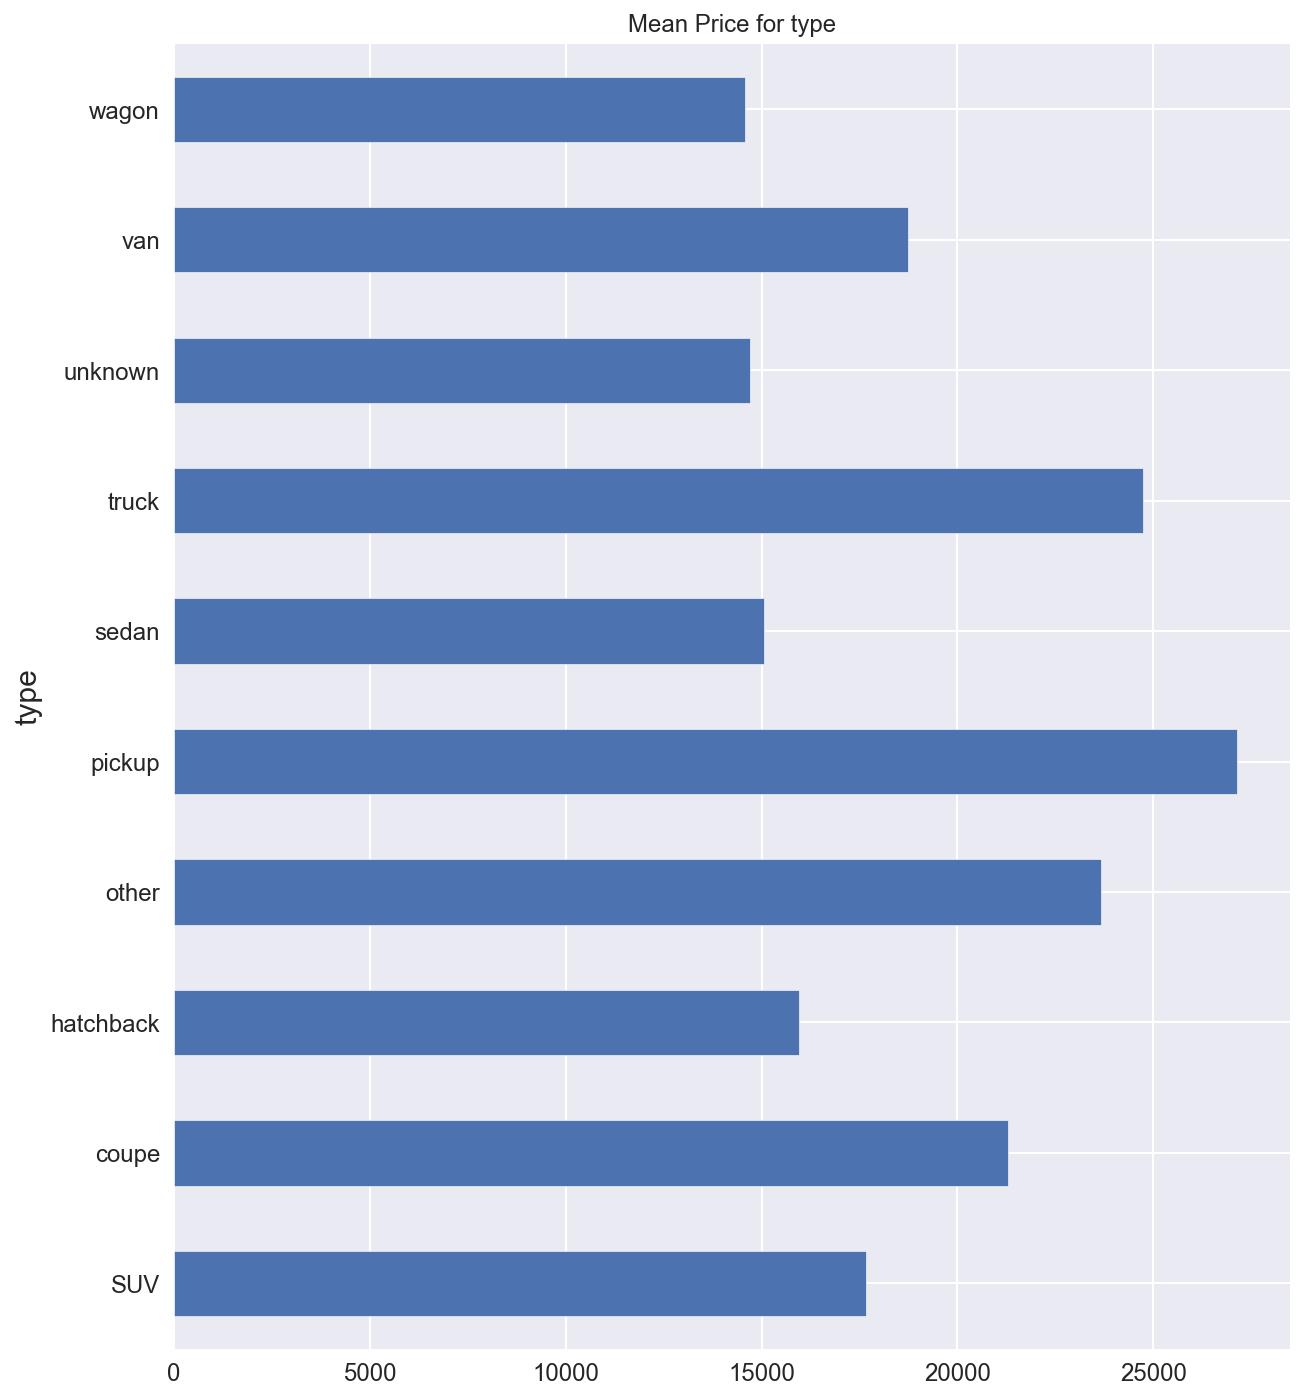

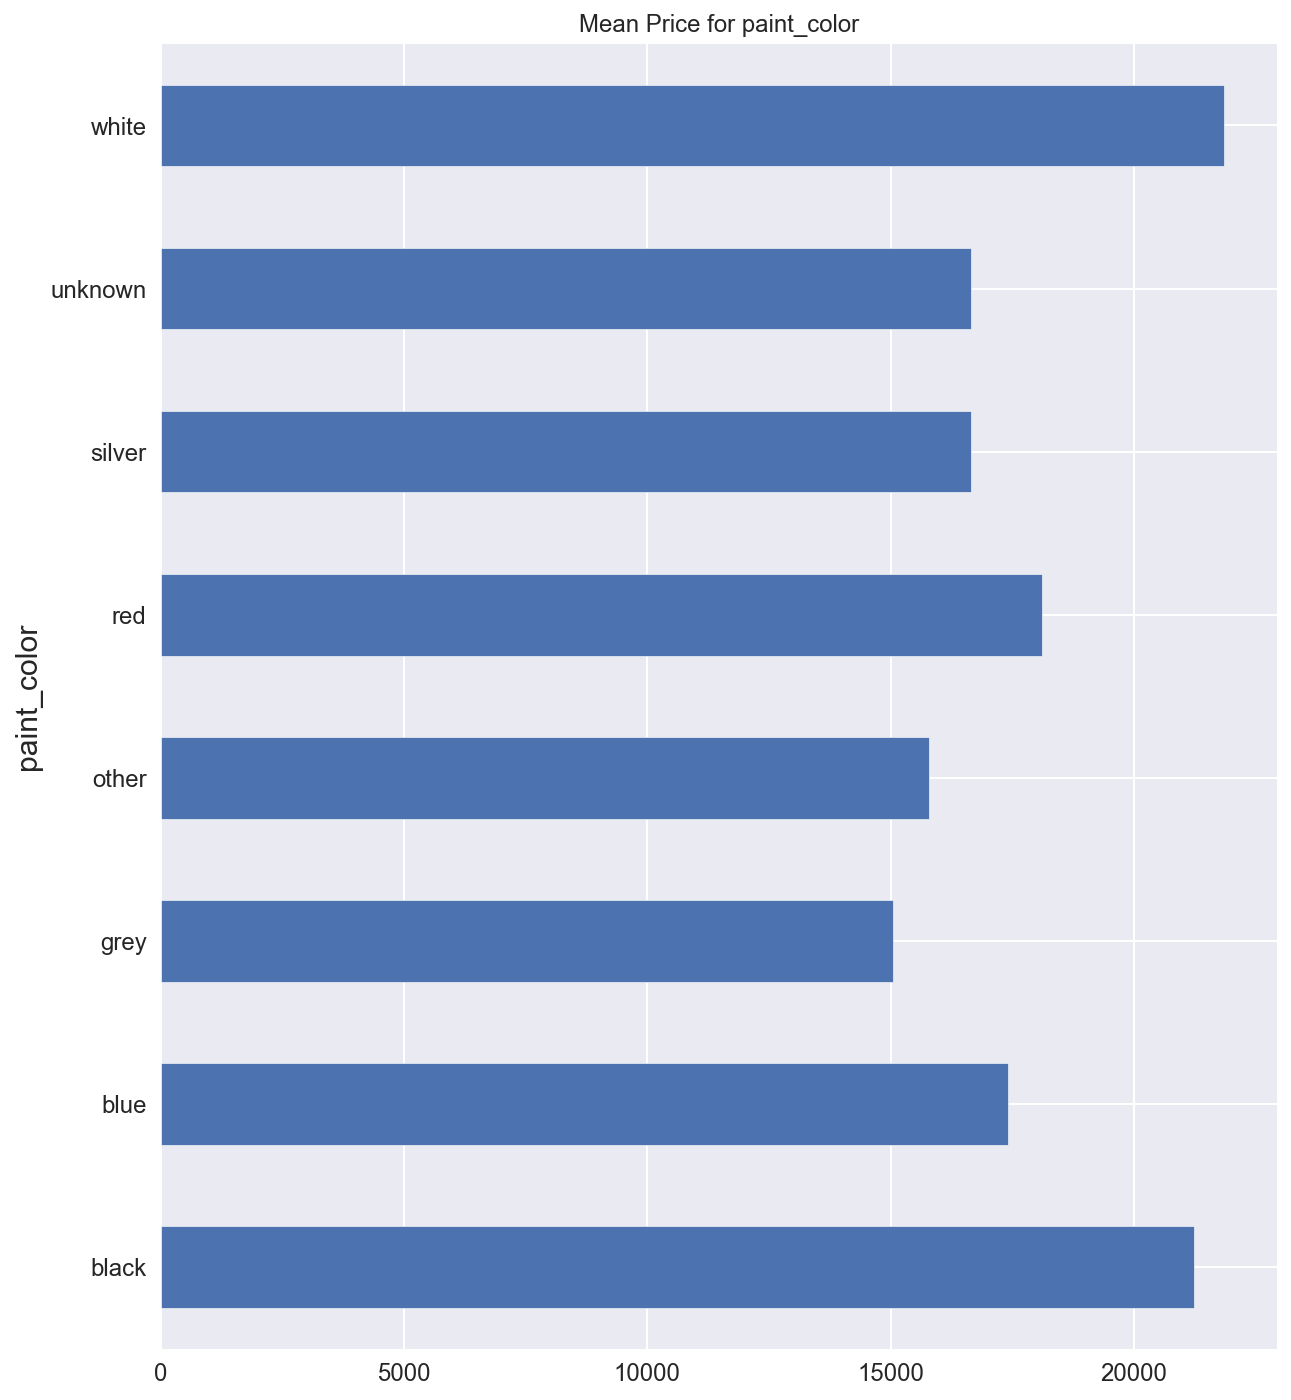

In [17]:
for cat in cats:
    plot_cat_vs_price(cat)

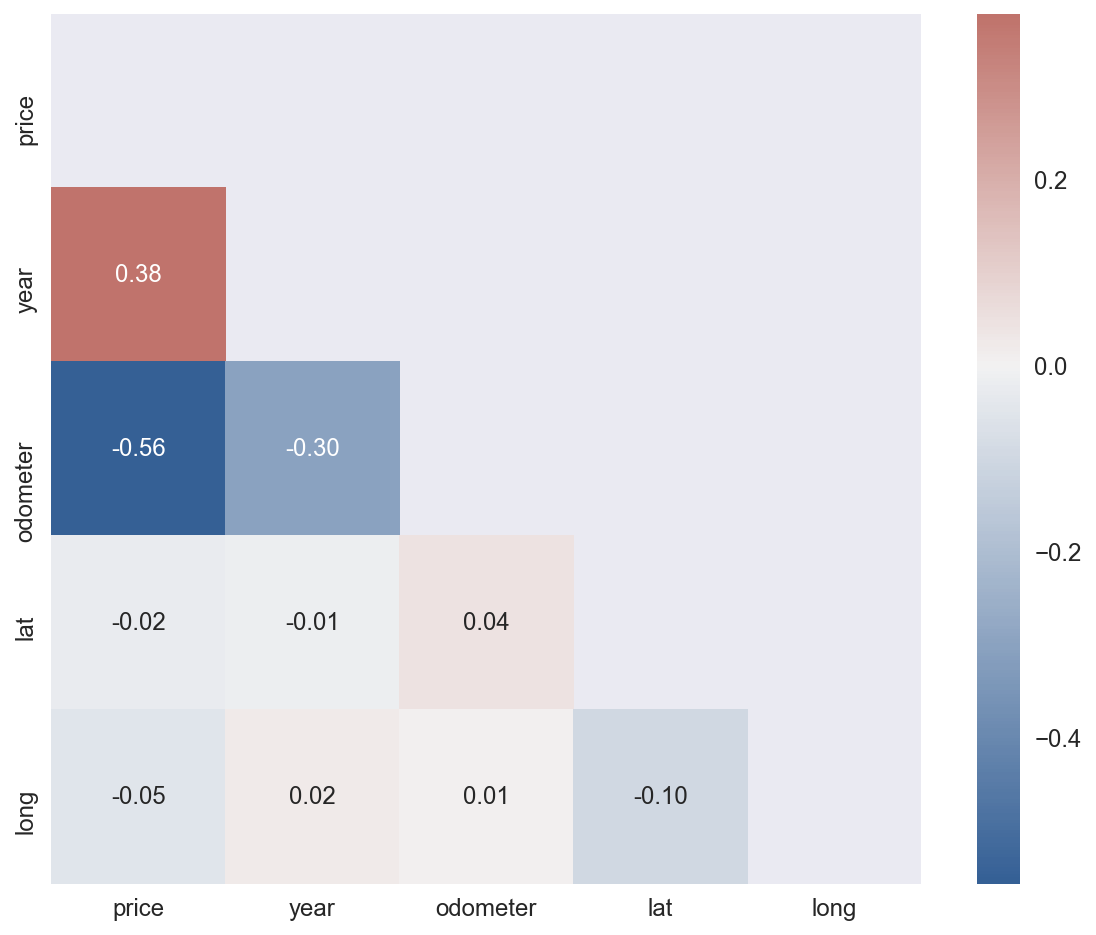

In [21]:
# Calculate pairwise-correlation
matrix = df.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()